In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [3]:
df = pd.read_csv("nursery_numerical.csv", sep=',')

In [4]:
data = df.iloc[:,0:8]
labels = df.iloc[:,8]

In [27]:
x = data.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df = pd.concat([df_scaled, labels], axis=1)
df

0    1     2         3    4    5    6    7        Class
0      0.0  0.0  0.00  0.000000  0.0  0.0  0.0  0.0    recommend
1      0.0  0.0  0.00  0.000000  0.0  0.0  0.0  0.5    not_recom
2      0.0  0.0  0.00  0.000000  0.0  0.0  0.5  1.0     priority
3      0.0  0.0  0.00  0.000000  0.0  0.0  1.0  0.0     priority
4      0.0  0.0  0.00  0.000000  0.0  0.0  1.0  1.0     priority
5      0.0  0.0  0.00  0.000000  0.0  0.0  1.0  0.5    not_recom
6      0.0  0.0  0.00  0.000000  0.0  1.0  0.0  0.0   very_recom
7      0.0  0.0  0.00  0.000000  0.0  1.0  0.0  1.0     priority
8      0.0  0.0  0.00  0.000000  0.0  1.0  0.0  0.5    not_recom
9      0.0  0.0  0.00  0.000000  0.0  1.0  0.5  0.0   very_recom
10     0.0  0.0  0.00  0.000000  0.0  1.0  0.5  1.0     priority
11     0.0  0.0  0.00  0.000000  0.0  1.0  0.5  0.5    not_recom
12     0.0  0.0  0.00  0.000000  0.0  1.0  1.0  0.0     priority
13     0.0  0.0  0.00  0.000000  0.0  1.0  1.0  0.5    not_recom
14     0.0  0.0  0.00  0.000000  0.5  0.0  0.0  0.0   very_recom
15     0.0  0.0  0.00  0.000000  0.5  0.0  0.0  1.0     priority
16     0.0  0.0  0.00  0.000000  0.5  0.0  0.5  0.0   very_recom
17     0.0  0.0  0.00  0.000000  0.5  0.0  0.5  1.0     priority
18     0.0  0.0  0.00  0.000000  0.5  0.0  0.5  0.5    not_recom
19     0.0  0.0  0.00  0.000000  0.5  0.0  1.0  0.0     priority
20     0.0  0.0  0.00  0.000000  0.5  0.0  1.0  1.0     priority
21     0.0  0.0  0.00  0.000000  0.5  1.0  0.0  0.0   very_recom
22     0.0  0.0  0.00  0.000000  0.5  1.0  0.0  1.0     priority
23     0.0  0.0  0.00  0.000000  0.5  1.0  0.5  0.0   very_recom
24     0.0  0.0  0.00  0.000000  0.5  1.0  0.5  0.5    not_recom
25     0.0  0.0  0.00  0.000000  0.5  1.0  1.0  0.0     priority
26     0.0  0.0  0.00  0.000000  1.0  0.0  0.0  0.0   very_recom
27     0.0  0.0  0.00  0.000000  1.0  0.0  0.0  1.0     priority
28     0.0  0.0  0.00  0.000000  1.0  0.0  0.0  0.5    not_recom
29     0.0  0.0  0.00  0.000000  1.0  0.0  0.5  0.0   very_recom
...    ...  ...   ...       ...  ...  ...  ...  ...          ...
12930  1.0  1.0  0.25  1.000000  0.0  0.0  0.5  1.0   spec_prior
12931  1.0  1.0  0.25  1.000000  0.0  1.0  1.0  1.0   spec_prior
12932  1.0  1.0  0.25  1.000000  0.5  0.0  0.5  0.0   spec_prior
12933  1.0  1.0  0.25  1.000000  0.5  0.0  1.0  0.0   spec_prior
12934  1.0  1.0  0.25  1.000000  0.5  0.0  1.0  0.5    not_recom
12935  1.0  1.0  0.25  1.000000  0.5  1.0  0.5  0.0   spec_prior
12936  1.0  1.0  0.25  1.000000  0.5  1.0  0.5  0.5    not_recom
12937  1.0  1.0  0.25  1.000000  1.0  0.0  1.0  0.5    not_recom
12938  1.0  1.0  0.25  1.000000  1.0  1.0  1.0  1.0   spec_prior
12939  1.0  1.0  0.25  1.000000  1.0  1.0  1.0  0.5    not_recom
12940  1.0  1.0  0.50  0.000000  0.0  0.0  0.0  0.0     priority
12941  1.0  1.0  0.50  0.000000  0.0  0.0  1.0  1.0   spec_prior
12942  1.0  1.0  0.50  0.000000  0.5  0.0  0.0  0.0   spec_prior
12943  1.0  1.0  0.50  0.000000  0.5  0.0  0.0  1.0   spec_prior
12944  1.0  1.0  0.50  0.000000  0.5  1.0  0.5  0.5    not_recom
12945  1.0  1.0  0.50  0.000000  1.0  1.0  0.0  0.0   spec_prior
12946  1.0  1.0  0.50  0.111111  0.0  0.0  0.5  1.0   spec_prior
12947  1.0  1.0  0.50  0.111111  0.5  0.0  1.0  0.0   spec_prior
12948  1.0  1.0  0.50  0.111111  0.5  1.0  0.0  0.5    not_recom
12949  1.0  1.0  0.50  0.111111  1.0  0.0  0.5  0.0   spec_prior
12950  1.0  1.0  0.50  0.111111  1.0  0.0  0.5  1.0   spec_prior
12951  1.0  1.0  0.50  0.111111  1.0  1.0  0.0  0.0   spec_prior
12952  1.0  1.0  0.50  0.222222  0.0  0.0  1.0  1.0   spec_prior
12953  1.0  1.0  0.50  0.222222  0.0  1.0  0.5  1.0   spec_prior
12954  1.0  1.0  0.50  1.000000  0.0  0.0  1.0  0.0   spec_prior
12955  1.0  1.0  0.50  1.000000  0.0  1.0  0.0  0.5    not_recom
12956  1.0  1.0  0.50  1.000000  0.5  0.0  0.5  0.5    not_recom
12957  1.0  1.0  0.50  1.000000  1.0  0.0  1.0  0.0   spec_prior
12958  1.0  1.0  0.50  1.000000  1.0  0.0  1.0  1.0   spec_prior
12959  1.0  1.0  0.50  1.000000  1.0  1.0  0

In [7]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/eleni/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/eleni/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


             precision    recall  f1-score   support

 very_recom       0.80      0.88      0.84      2082
   priority       0.77      0.81      0.79      2192
 spec_prior       0.00      0.00      0.00         0
  recommend       0.88      0.72      0.79      2054
  not_recom       0.55      0.72      0.63       152

avg / total       0.81      0.80      0.80      6480

accuracy:  0.8020061728395061


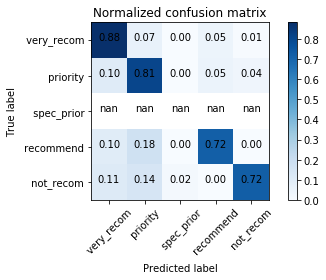

             precision    recall  f1-score   support

 very_recom       0.85      0.85      0.85      2237
   priority       0.75      0.83      0.79      2074
 spec_prior       0.00      0.00      0.00         2
  recommend       0.87      0.75      0.80      1991
  not_recom       0.57      0.78      0.66       176

avg / total       0.82      0.81      0.81      6480

accuracy:  0.8106481481481481


/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


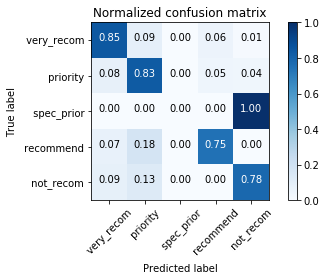

             precision    recall  f1-score   support

 very_recom       0.83      0.87      0.85      2162
   priority       0.77      0.81      0.79      2109
 spec_prior       0.00      0.00      0.00         2
  recommend       0.86      0.75      0.80      2039
  not_recom       0.55      0.73      0.63       168

avg / total       0.81      0.81      0.81      6480

accuracy:  0.8066358024691358


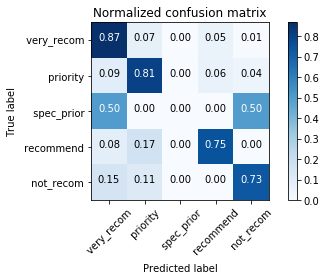

             precision    recall  f1-score   support

 very_recom       0.82      0.87      0.85      2157
   priority       0.78      0.81      0.80      2157
 spec_prior       0.00      0.00      0.00         0
  recommend       0.88      0.76      0.81      2006
  not_recom       0.59      0.81      0.68       160

avg / total       0.82      0.82      0.82      6480

accuracy:  0.8155864197530864


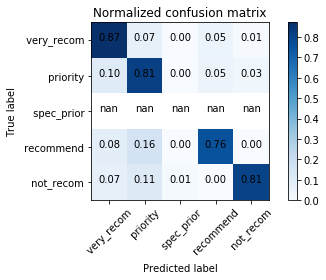

             precision    recall  f1-score   support

 very_recom       0.81      0.84      0.82      2170
   priority       0.76      0.80      0.78      2109
 spec_prior       0.00      0.00      0.00         2
  recommend       0.84      0.75      0.79      2036
  not_recom       0.60      0.74      0.66       163

avg / total       0.80      0.80      0.80      6480

accuracy:  0.7955246913580247


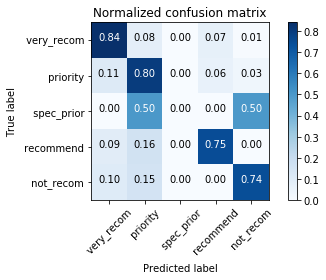

             precision    recall  f1-score   support

 very_recom       0.83      0.88      0.85      2149
   priority       0.78      0.83      0.80      2157
 spec_prior       0.00      0.00      0.00         0
  recommend       0.88      0.74      0.81      2009
  not_recom       0.59      0.76      0.67       165

avg / total       0.82      0.82      0.82      6480

accuracy:  0.8160493827160494


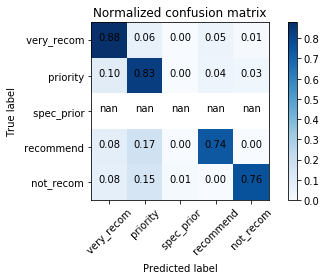

             precision    recall  f1-score   support

 very_recom       0.81      0.85      0.83      2167
   priority       0.77      0.81      0.79      2138
 spec_prior       0.25      1.00      0.40         1
  recommend       0.85      0.75      0.79      1996
  not_recom       0.61      0.72      0.66       178

avg / total       0.80      0.80      0.80      6480

accuracy:  0.7998456790123457


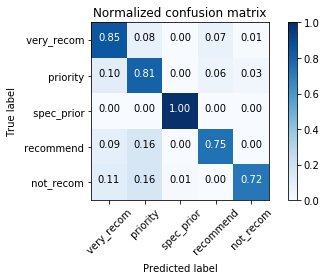

             precision    recall  f1-score   support

 very_recom       0.85      0.86      0.85      2152
   priority       0.78      0.84      0.81      2128
 spec_prior       0.00      0.00      0.00         1
  recommend       0.87      0.75      0.81      2049
  not_recom       0.51      0.78      0.61       150

avg / total       0.82      0.82      0.82      6480

accuracy:  0.816820987654321


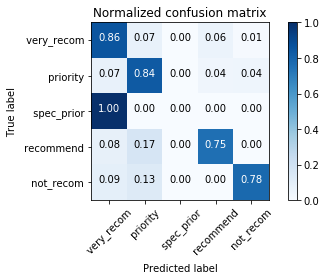

             precision    recall  f1-score   support

 very_recom       0.84      0.88      0.86      2198
   priority       0.75      0.84      0.79      2097
 spec_prior       0.00      0.00      0.00         2
  recommend       0.90      0.73      0.81      2013
  not_recom       0.60      0.76      0.67       170

avg / total       0.82      0.82      0.82      6480

accuracy:  0.8160493827160494


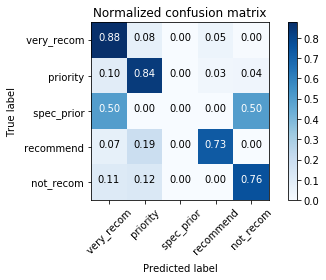

             precision    recall  f1-score   support

 very_recom       0.82      0.85      0.83      2121
   priority       0.79      0.80      0.79      2169
 spec_prior       0.00      0.00      0.00         0
  recommend       0.85      0.77      0.81      2032
  not_recom       0.59      0.83      0.69       158

avg / total       0.81      0.81      0.81      6480

accuracy:  0.8072530864197531


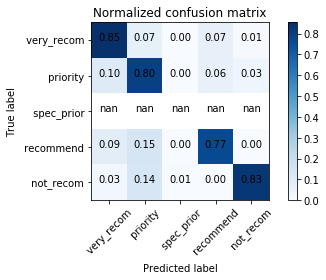

In [9]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2144
   priority       0.87      0.95      0.91      2129
 spec_prior       0.97      0.85      0.90      2052
  not_recom       0.95      0.68      0.79       155

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9228395061728395


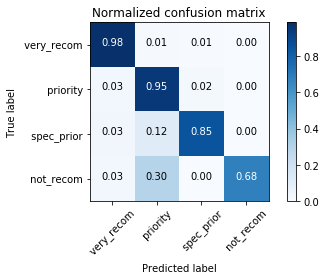

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.96      2175
   priority       0.88      0.95      0.91      2137
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.87      0.91      1993
  not_recom       0.97      0.73      0.84       173

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9277777777777778


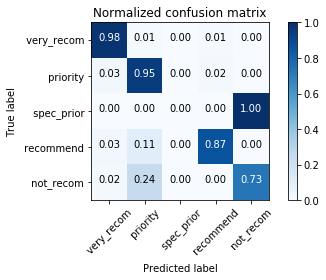

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2146
   priority       0.88      0.95      0.91      2149
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.87      0.91      1999
  not_recom       0.97      0.64      0.77       185

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9246913580246914


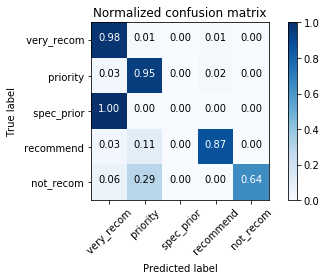

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.96      2173
   priority       0.88      0.96      0.91      2117
 spec_prior       0.00      0.00      0.00         1
  recommend       0.97      0.86      0.91      2046
  not_recom       0.92      0.76      0.84       143

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9287037037037037


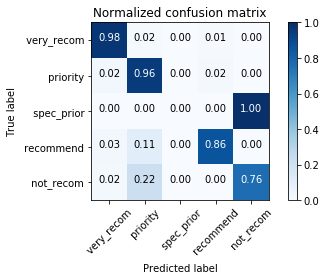

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2191
   priority       0.89      0.94      0.91      2154
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.87      0.91      1980
  not_recom       0.89      0.75      0.81       154

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9279320987654321


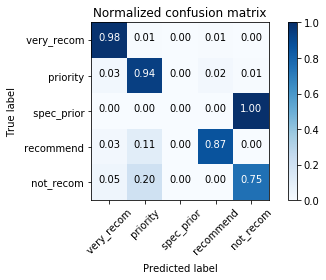

             precision    recall  f1-score   support

 very_recom       0.93      0.98      0.96      2128
   priority       0.87      0.95      0.91      2112
 spec_prior       0.00      0.00      0.00         1
  recommend       0.97      0.86      0.91      2065
  not_recom       0.97      0.69      0.81       174

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9219135802469136


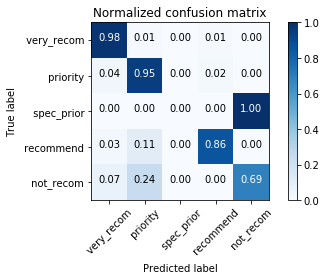

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2178
   priority       0.87      0.95      0.91      2126
 spec_prior       0.96      0.85      0.90      2021
  not_recom       0.93      0.74      0.83       155

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9222222222222223


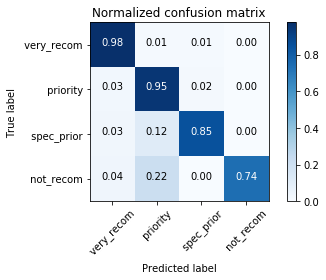

             precision    recall  f1-score   support

 very_recom       0.95      0.99      0.97      2141
   priority       0.88      0.95      0.91      2140
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.87      0.92      2024
  not_recom       0.99      0.61      0.76       173

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9277777777777778


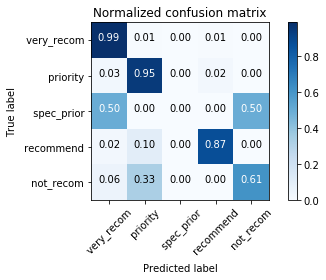

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.96      2162
   priority       0.89      0.94      0.91      2159
 spec_prior       0.00      0.00      0.00         2
  recommend       0.95      0.88      0.91      1980
  not_recom       0.97      0.65      0.78       177

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9268518518518518


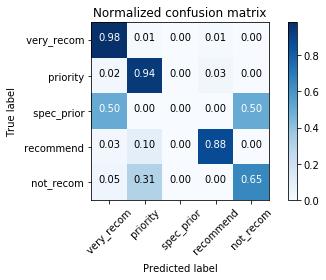

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2157
   priority       0.88      0.95      0.92      2107
 spec_prior       0.97      0.86      0.91      2065
  not_recom       0.93      0.81      0.87       151

avg / total       0.93      0.93      0.93      6480

accuracy:  0.929320987654321


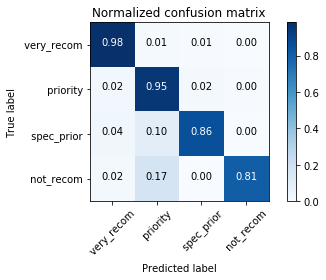

In [10]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.95      2157
   priority       0.84      0.95      0.89      2093
 spec_prior       0.96      0.84      0.89      2062
  not_recom       0.97      0.63      0.77       168

avg / total       0.92      0.91      0.91      6480

accuracy:  0.9104938271604939


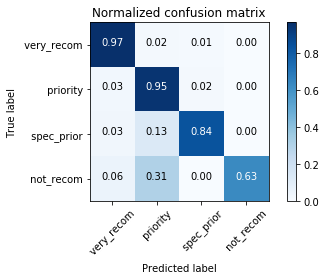

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.96      2162
   priority       0.88      0.94      0.91      2173
 spec_prior       0.00      0.00      0.00         2
  recommend       0.95      0.86      0.90      1983
  not_recom       0.88      0.69      0.77       160

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9205246913580247


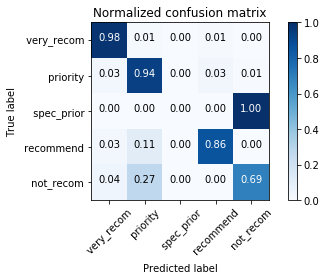

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.96      2115
   priority       0.86      0.94      0.90      2151
 spec_prior       0.00      0.00      0.00         2
  recommend       0.95      0.84      0.89      2041
  not_recom       0.94      0.68      0.79       171

avg / total       0.92      0.91      0.91      6480

accuracy:  0.9146604938271605


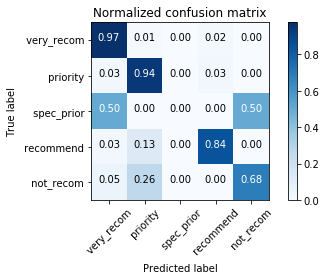

             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2204
   priority       0.86      0.96      0.91      2115
 spec_prior       0.96      0.86      0.91      2004
  not_recom       0.95      0.67      0.78       157

avg / total       0.93      0.93      0.92      6480

accuracy:  0.9254629629629629


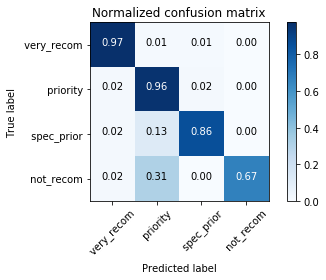

             precision    recall  f1-score   support

 very_recom       0.96      0.99      0.97      2157
   priority       0.87      0.95      0.91      2142
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.86      0.91      2014
  not_recom       0.95      0.72      0.82       166

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9277777777777778


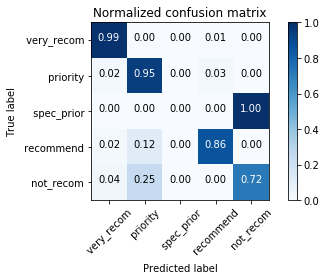

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2162
   priority       0.87      0.94      0.91      2124
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.88      0.91      2031
  not_recom       0.92      0.68      0.78       162

avg / total       0.93      0.92      0.92      6480

accuracy:  0.924537037037037


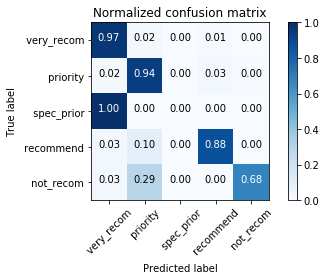

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.96      2123
   priority       0.88      0.94      0.91      2167
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.86      0.90      2040
  not_recom       0.93      0.78      0.85       149

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9217592592592593


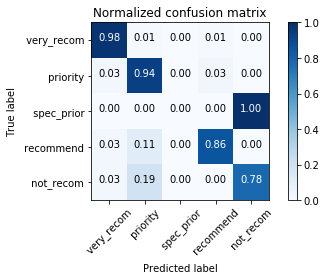

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2196
   priority       0.87      0.95      0.91      2099
 spec_prior       0.00      0.00      0.00         1
  recommend       0.97      0.86      0.91      2005
  not_recom       0.89      0.64      0.74       179

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9268518518518518


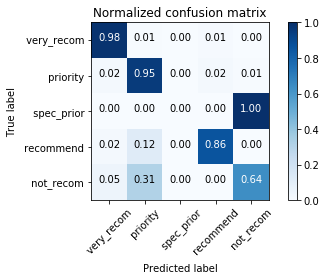

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2150
   priority       0.88      0.93      0.90      2151
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.87      0.90      2016
  not_recom       0.96      0.70      0.81       161

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9205246913580247


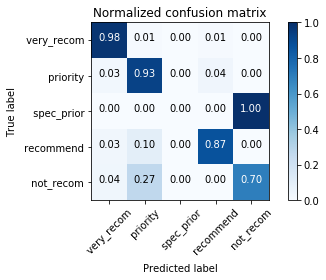

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2169
   priority       0.86      0.96      0.91      2115
 spec_prior       0.97      0.85      0.90      2029
  not_recom       0.92      0.69      0.79       167

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9231481481481482


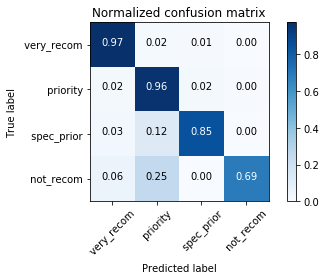

In [11]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.95      0.96      0.96      2153
   priority       0.86      0.95      0.90      2102
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.85      0.90      2062
  not_recom       0.98      0.71      0.82       162

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9182098765432098


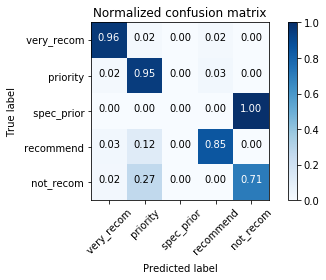

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2166
   priority       0.89      0.94      0.92      2164
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.88      0.91      1983
  not_recom       0.93      0.66      0.77       166

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9308641975308642


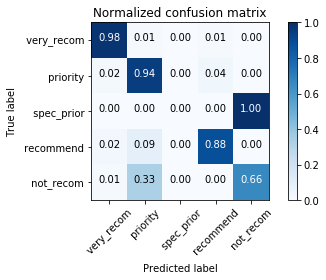

             precision    recall  f1-score   support

 very_recom       0.96      0.97      0.96      2147
   priority       0.88      0.95      0.91      2135
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.88      0.91      2028
  not_recom       0.96      0.64      0.77       169

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9237654320987654


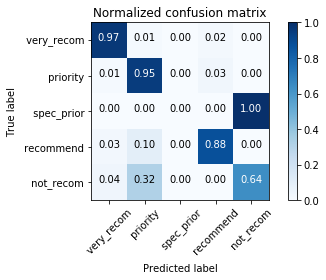

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2172
   priority       0.87      0.94      0.90      2131
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.87      0.91      2017
  not_recom       0.95      0.67      0.78       159

avg / total       0.93      0.92      0.92      6480

accuracy:  0.924537037037037


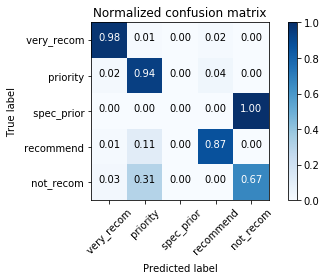

             precision    recall  f1-score   support

 very_recom       0.96      0.97      0.97      2168
   priority       0.85      0.95      0.90      2132
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.85      0.90      2008
  not_recom       0.95      0.58      0.72       171

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9175925925925926


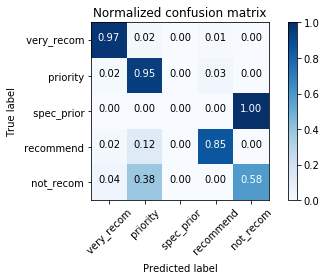

             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2151
   priority       0.87      0.94      0.91      2134
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.88      0.91      2037
  not_recom       0.87      0.69      0.77       157

avg / total       0.93      0.93      0.92      6480

accuracy:  0.9251543209876543


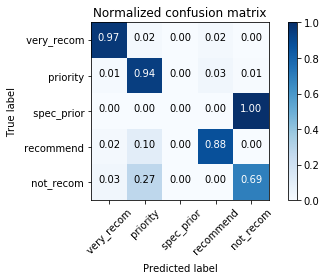

             precision    recall  f1-score   support

 very_recom       0.96      0.97      0.97      2138
   priority       0.87      0.93      0.90      2155
 spec_prior       0.00      0.00      0.00         1
  recommend       0.93      0.87      0.90      2022
  not_recom       0.93      0.64      0.76       164

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9192901234567902


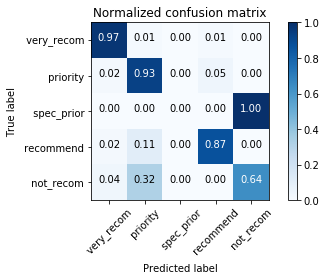

             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2181
   priority       0.86      0.97      0.91      2111
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.86      0.91      2023
  not_recom       0.97      0.62      0.75       164

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9274691358024691


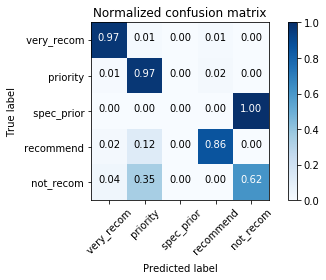

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2152
   priority       0.86      0.94      0.90      2121
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.86      0.90      2039
  not_recom       0.97      0.66      0.79       167

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9163580246913581


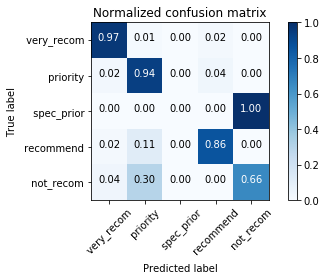

             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2167
   priority       0.88      0.94      0.91      2145
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.89      0.91      2006
  not_recom       0.89      0.68      0.77       161

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9280864197530864


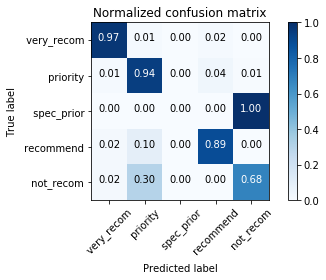

In [12]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2130
   priority       0.88      0.94      0.91      2131
 spec_prior       0.94      0.88      0.91      2057
  not_recom       0.94      0.57      0.71       162

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9242283950617284


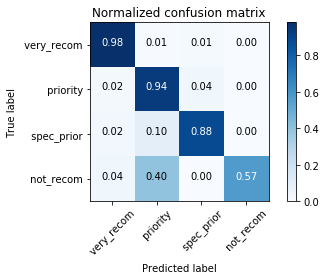

             precision    recall  f1-score   support

 very_recom       0.97      0.98      0.98      2189
   priority       0.87      0.94      0.91      2135
 spec_prior       0.00      0.00      0.00         2
  recommend       0.95      0.89      0.92      1988
  not_recom       0.92      0.54      0.68       166

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9287037037037037


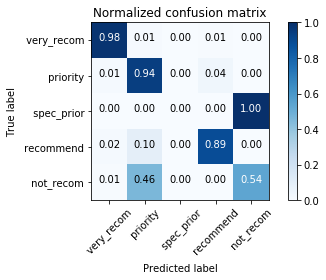

             precision    recall  f1-score   support

 very_recom       0.96      0.99      0.97      2157
   priority       0.88      0.94      0.91      2130
 spec_prior       0.94      0.88      0.91      2025
  not_recom       0.97      0.61      0.75       168

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9276234567901235


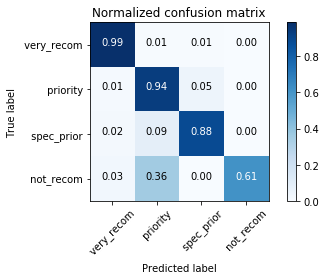

             precision    recall  f1-score   support

 very_recom       0.96      0.99      0.97      2162
   priority       0.88      0.94      0.91      2136
 spec_prior       0.00      0.00      0.00         2
  recommend       0.95      0.88      0.91      2020
  not_recom       0.89      0.61      0.72       160

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9277777777777778


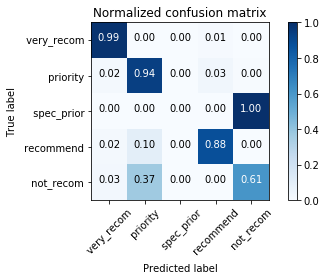

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2169
   priority       0.88      0.94      0.91      2129
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.89      0.92      2008
  not_recom       0.97      0.57      0.72       172

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9265432098765433


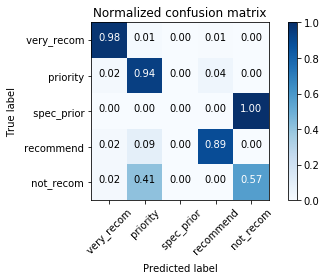

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2150
   priority       0.88      0.95      0.91      2137
 spec_prior       0.96      0.87      0.91      2037
  not_recom       0.95      0.63      0.76       156

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9282407407407407


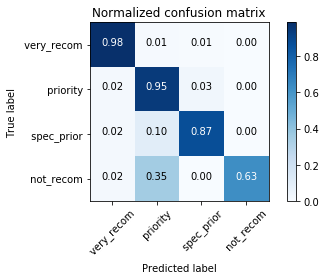

             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2183
   priority       0.90      0.94      0.92      2153
 spec_prior       0.00      0.00      0.00         2
  recommend       0.93      0.90      0.92      1997
  not_recom       0.92      0.69      0.79       145

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9325617283950617


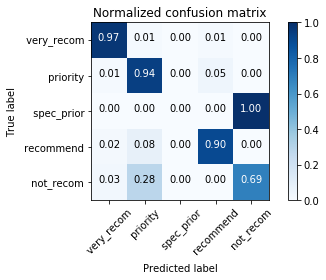

             precision    recall  f1-score   support

 very_recom       0.96      0.99      0.98      2136
   priority       0.85      0.95      0.90      2113
 spec_prior       0.95      0.86      0.91      2048
  not_recom       0.99      0.48      0.64       183

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9203703703703704


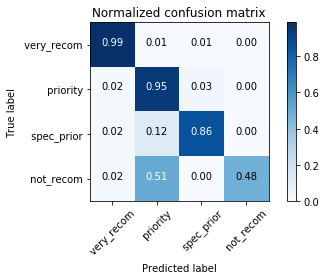

             precision    recall  f1-score   support

 very_recom       0.97      0.98      0.97      2155
   priority       0.87      0.95      0.91      2143
 spec_prior       0.00      0.00      0.00         2
  recommend       0.95      0.88      0.91      2015
  not_recom       0.90      0.53      0.66       165

avg / total       0.93      0.93      0.92      6480

accuracy:  0.9253086419753086


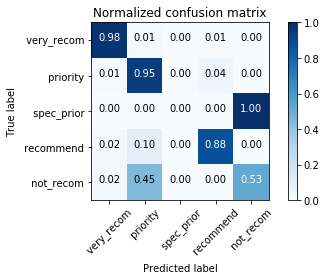

             precision    recall  f1-score   support

 very_recom       0.96      0.99      0.97      2164
   priority       0.88      0.95      0.91      2123
 spec_prior       0.95      0.87      0.91      2030
  not_recom       0.99      0.64      0.78       163

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9296296296296296


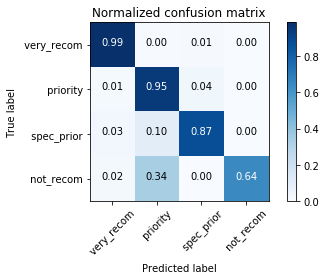

In [13]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.94      0.96      0.95      2170
   priority       0.87      0.94      0.90      2136
 spec_prior       0.00      0.00      0.00         2
  recommend       0.93      0.88      0.90      1991
  not_recom       0.96      0.42      0.58       181

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9109567901234568


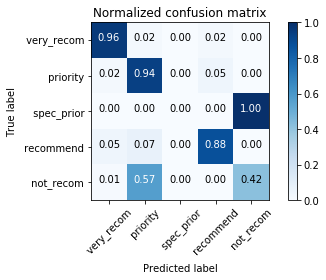

             precision    recall  f1-score   support

 very_recom       0.93      0.97      0.95      2149
   priority       0.88      0.92      0.90      2130
 spec_prior       0.93      0.87      0.90      2054
  not_recom       0.99      0.61      0.76       147

avg / total       0.92      0.91      0.91      6480

accuracy:  0.9140432098765432


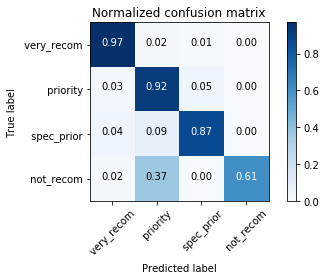

             precision    recall  f1-score   support

 very_recom       0.93      0.96      0.95      2162
   priority       0.85      0.94      0.89      2098
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.85      0.90      2047
  not_recom       0.97      0.40      0.56       172

avg / total       0.91      0.91      0.90      6480

accuracy:  0.9061728395061729


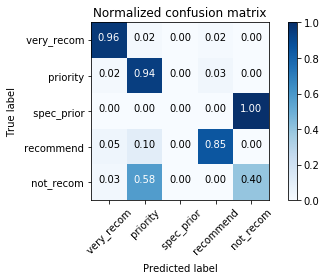

             precision    recall  f1-score   support

 very_recom       0.92      0.97      0.94      2157
   priority       0.90      0.90      0.90      2168
 spec_prior       0.00      0.00      0.00         1
  recommend       0.92      0.89      0.90      1998
  not_recom       0.97      0.55      0.70       156

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9121913580246913


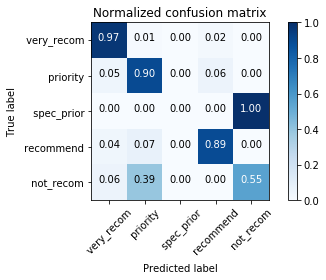

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.95      2162
   priority       0.87      0.94      0.90      2105
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.88      0.91      2049
  not_recom       0.99      0.46      0.62       162

avg / total       0.92      0.91      0.91      6480

accuracy:  0.9149691358024692


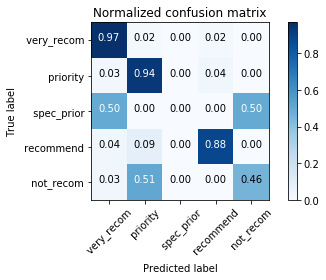

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2157
   priority       0.89      0.92      0.90      2161
 spec_prior       0.94      0.89      0.91      1996
  not_recom       0.96      0.46      0.62       166

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9200617283950617


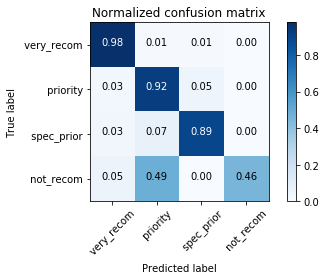

             precision    recall  f1-score   support

 very_recom       0.93      0.96      0.94      2166
   priority       0.87      0.92      0.89      2148
 spec_prior       0.00      0.00      0.00         1
  recommend       0.92      0.88      0.90      1997
  not_recom       0.95      0.42      0.58       168

avg / total       0.91      0.90      0.90      6480

accuracy:  0.9049382716049382


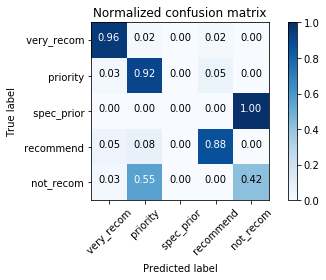

             precision    recall  f1-score   support

 very_recom       0.93      0.97      0.95      2153
   priority       0.88      0.93      0.91      2118
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.89      0.91      2048
  not_recom       0.96      0.49      0.65       160

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9179012345679012


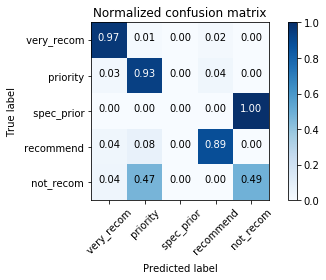

             precision    recall  f1-score   support

 very_recom       0.96      0.96      0.96      2230
   priority       0.88      0.93      0.90      2109
 spec_prior       0.93      0.89      0.91      1982
  not_recom       0.97      0.47      0.64       159

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9191358024691358


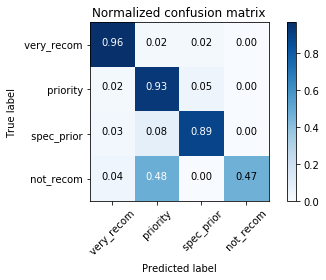

             precision    recall  f1-score   support

 very_recom       0.91      0.98      0.94      2089
   priority       0.87      0.91      0.89      2157
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.86      0.90      2063
  not_recom       0.95      0.46      0.62       169

avg / total       0.91      0.91      0.90      6480

accuracy:  0.9050925925925926


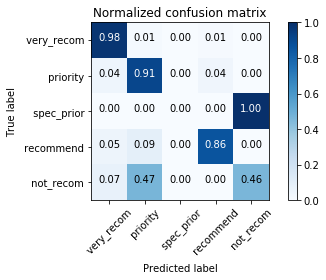

In [14]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.89      0.91      0.90      2164
   priority       0.87      0.90      0.89      2177
 spec_prior       0.00      0.00      0.00         2
  recommend       0.87      0.86      0.87      1963
  not_recom       0.96      0.28      0.44       174

avg / total       0.88      0.88      0.87      6480

accuracy:  0.8768518518518519


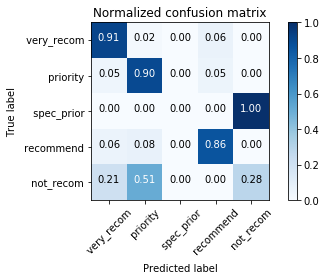

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.90      0.94      0.92      2155
   priority       0.84      0.92      0.88      2089
 spec_prior       0.93      0.83      0.88      2082
  not_recom       0.94      0.43      0.59       154

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8878086419753086


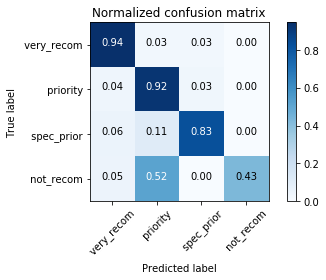

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.88      0.94      0.91      2112
   priority       0.85      0.90      0.87      2135
 spec_prior       0.91      0.84      0.87      2068
  not_recom       0.98      0.34      0.50       165

avg / total       0.88      0.88      0.87      6480

accuracy:  0.8776234567901234


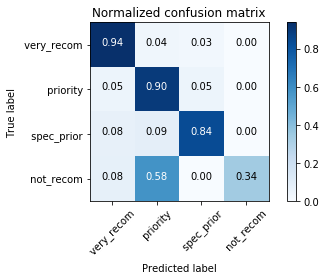

             precision    recall  f1-score   support

 very_recom       0.90      0.93      0.92      2207
   priority       0.86      0.91      0.88      2131
 spec_prior       0.00      0.00      0.00         2
  recommend       0.89      0.85      0.87      1977
  not_recom       0.96      0.40      0.56       163

avg / total       0.89      0.89      0.88      6480

accuracy:  0.8853395061728395


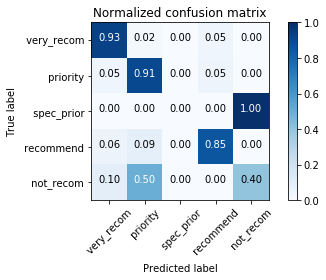

             precision    recall  f1-score   support

 very_recom       0.90      0.95      0.92      2160
   priority       0.85      0.91      0.88      2146
 spec_prior       0.00      0.00      0.00         1
  recommend       0.92      0.84      0.88      2009
  not_recom       0.96      0.41      0.57       164

avg / total       0.89      0.89      0.88      6480

accuracy:  0.8868827160493827


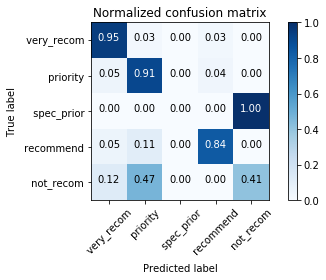

             precision    recall  f1-score   support

 very_recom       0.88      0.92      0.90      2159
   priority       0.85      0.90      0.88      2120
 spec_prior       0.00      0.00      0.00         1
  recommend       0.89      0.84      0.87      2036
  not_recom       0.97      0.37      0.54       164

avg / total       0.88      0.87      0.87      6480

accuracy:  0.8742283950617284


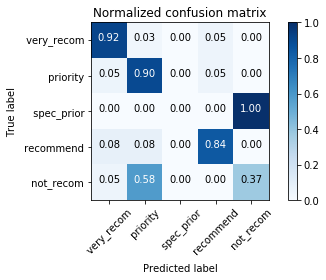

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.89      0.94      0.91      2123
   priority       0.86      0.89      0.88      2139
 spec_prior       0.90      0.85      0.88      2050
  not_recom       0.99      0.42      0.59       168

avg / total       0.89      0.88      0.88      6480

accuracy:  0.8848765432098765


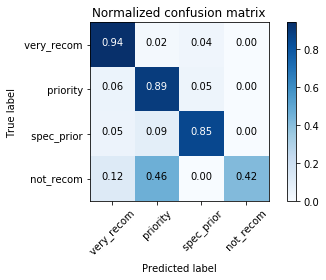

             precision    recall  f1-score   support

 very_recom       0.90      0.92      0.91      2196
   priority       0.85      0.91      0.88      2127
 spec_prior       0.00      0.00      0.00         2
  recommend       0.90      0.86      0.88      1995
  not_recom       0.95      0.36      0.52       160

avg / total       0.89      0.89      0.88      6480

accuracy:  0.8850308641975309


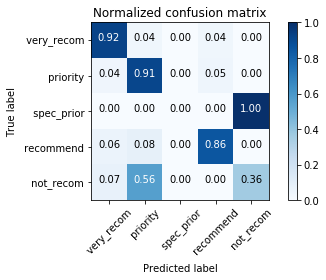

             precision    recall  f1-score   support

 very_recom       0.90      0.92      0.91      2183
   priority       0.85      0.90      0.88      2157
 spec_prior       0.00      0.00      0.00         2
  recommend       0.89      0.85      0.87      1977
  not_recom       0.97      0.40      0.56       161

avg / total       0.88      0.88      0.88      6480

accuracy:  0.8804012345679012


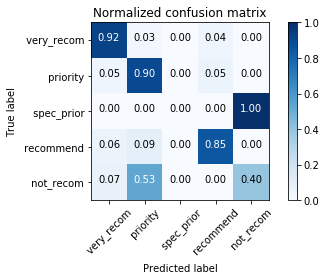

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.89      0.92      0.91      2136
   priority       0.84      0.90      0.87      2109
 spec_prior       0.90      0.83      0.86      2068
  not_recom       0.96      0.43      0.60       167

avg / total       0.88      0.88      0.87      6480

accuracy:  0.875


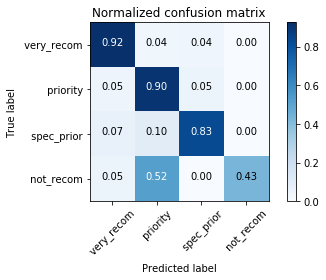

In [28]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.73      0.87      0.79      2100
   priority       0.82      0.84      0.83      2130
 spec_prior       0.00      0.00      0.00         2
  recommend       0.88      0.74      0.80      2077
  not_recom       0.92      0.14      0.24       171

avg / total       0.81      0.80      0.79      6480

accuracy:  0.7998456790123457


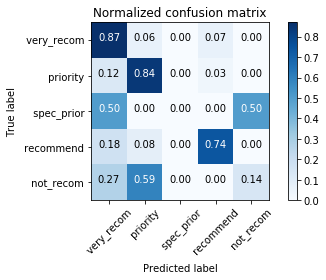

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.80      0.79      0.80      2219
   priority       0.81      0.85      0.83      2136
 spec_prior       0.80      0.83      0.82      1968
  not_recom       1.00      0.18      0.31       157

avg / total       0.81      0.81      0.80      6480

accuracy:  0.8066358024691358


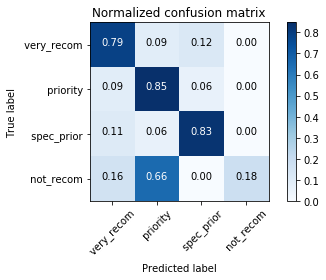

             precision    recall  f1-score   support

 very_recom       0.78      0.84      0.80      2163
   priority       0.81      0.85      0.83      2117
 spec_prior       0.00      0.00      0.00         2
  recommend       0.86      0.79      0.82      2038
  not_recom       0.93      0.23      0.37       160

avg / total       0.82      0.81      0.81      6480

accuracy:  0.8112654320987654


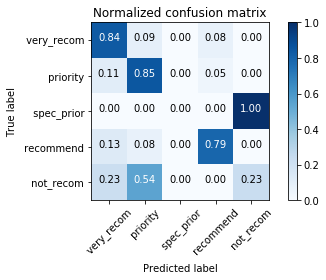

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.77      0.85      0.81      2156
   priority       0.82      0.83      0.83      2149
 spec_prior       0.83      0.79      0.81      2007
  not_recom       1.00      0.07      0.13       168

avg / total       0.81      0.81      0.80      6480

accuracy:  0.8057098765432099


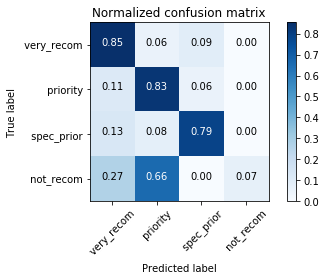

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.77      0.83      0.80      2148
   priority       0.79      0.85      0.82      2097
 spec_prior       0.85      0.77      0.81      2075
  not_recom       1.00      0.19      0.32       160

avg / total       0.81      0.80      0.80      6480

accuracy:  0.8013888888888889


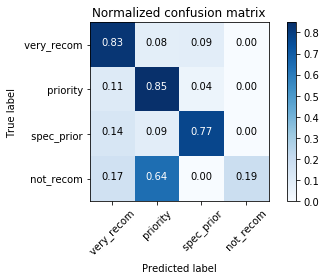

             precision    recall  f1-score   support

 very_recom       0.76      0.84      0.80      2171
   priority       0.82      0.82      0.82      2169
 spec_prior       0.00      0.00      0.00         2
  recommend       0.85      0.80      0.82      1970
  not_recom       0.92      0.14      0.24       168

avg / total       0.81      0.80      0.80      6480

accuracy:  0.803395061728395


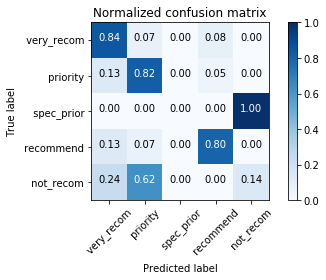

             precision    recall  f1-score   support

 very_recom       0.75      0.86      0.80      2120
   priority       0.82      0.82      0.82      2171
 spec_prior       0.00      0.00      0.00         1
  recommend       0.85      0.79      0.82      2008
  not_recom       0.90      0.11      0.19       180

avg / total       0.81      0.80      0.80      6480

accuracy:  0.8037037037037037


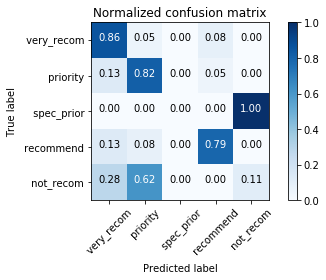

             precision    recall  f1-score   support

 very_recom       0.79      0.81      0.80      2199
   priority       0.80      0.86      0.83      2095
 spec_prior       0.00      0.00      0.00         1
  recommend       0.84      0.79      0.81      2037
  not_recom       0.97      0.24      0.38       148

avg / total       0.81      0.81      0.80      6480

accuracy:  0.8064814814814815


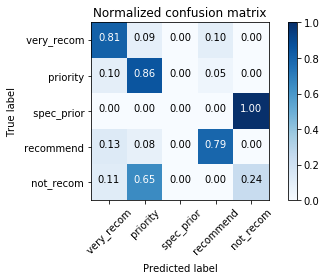

             precision    recall  f1-score   support

 very_recom       0.75      0.82      0.78      2158
   priority       0.83      0.83      0.83      2123
 spec_prior       0.00      0.00      0.00         1
  recommend       0.82      0.80      0.81      2035
  not_recom       0.89      0.15      0.26       163

avg / total       0.80      0.80      0.79      6480

accuracy:  0.7998456790123457


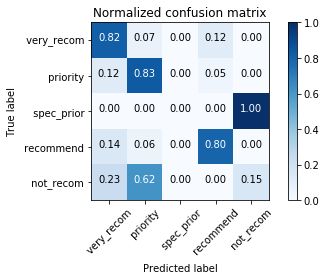

             precision    recall  f1-score   support

 very_recom       0.78      0.84      0.81      2161
   priority       0.80      0.85      0.83      2143
 spec_prior       0.00      0.00      0.00         1
  recommend       0.85      0.78      0.81      2010
  not_recom       1.00      0.13      0.24       165

avg / total       0.81      0.81      0.80      6480

accuracy:  0.8070987654320988


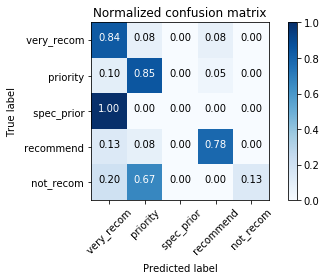

In [16]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.69      0.74      0.71      2177
   priority       0.74      0.80      0.77      2089
 spec_prior       0.00      0.00      0.00         2
  recommend       0.82      0.75      0.78      2038
  not_recom       0.00      0.00      0.00       174

avg / total       0.73      0.74      0.73      6480

accuracy:  0.7425925925925926


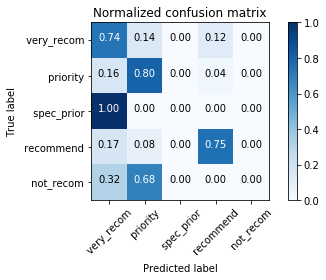

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.67      0.76      0.71      2142
   priority       0.82      0.77      0.79      2177
 spec_prior       0.77      0.76      0.77      2007
  not_recom       1.00      0.10      0.18       154

avg / total       0.76      0.75      0.74      6480

accuracy:  0.7481481481481481


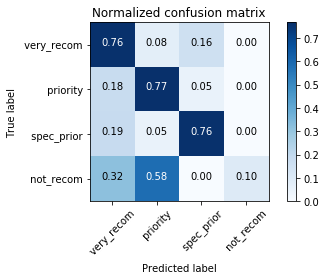

             precision    recall  f1-score   support

 very_recom       0.65      0.79      0.72      2126
   priority       0.79      0.75      0.77      2158
 spec_prior       0.00      0.00      0.00         1
  recommend       0.82      0.73      0.77      2043
  not_recom       1.00      0.05      0.10       152

avg / total       0.76      0.74      0.74      6480

accuracy:  0.7444444444444445


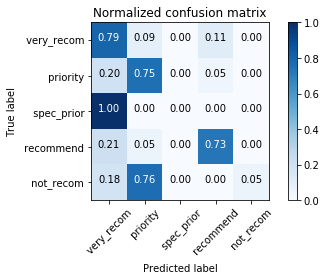

             precision    recall  f1-score   support

 very_recom       0.72      0.70      0.71      2193
   priority       0.75      0.83      0.79      2108
 spec_prior       0.00      0.00      0.00         1
  recommend       0.79      0.78      0.78      2002
  not_recom       1.00      0.03      0.06       176

avg / total       0.75      0.75      0.74      6480

accuracy:  0.7483024691358025


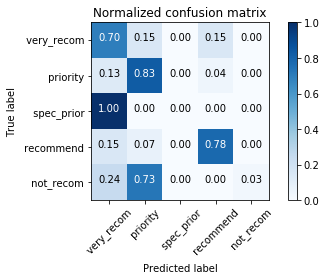

             precision    recall  f1-score   support

 very_recom       0.71      0.75      0.73      2172
   priority       0.76      0.85      0.80      2094
 spec_prior       0.00      0.00      0.00         1
  recommend       0.82      0.73      0.77      2044
  not_recom       0.73      0.05      0.09       169

avg / total       0.76      0.76      0.75      6480

accuracy:  0.7578703703703704


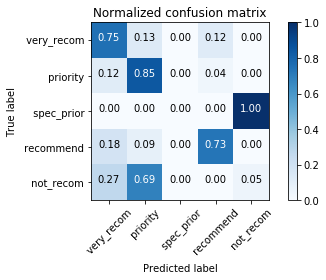

             precision    recall  f1-score   support

 very_recom       0.64      0.76      0.69      2147
   priority       0.80      0.73      0.76      2172
 spec_prior       0.00      0.00      0.00         1
  recommend       0.78      0.76      0.77      2001
  not_recom       1.00      0.06      0.11       159

avg / total       0.75      0.73      0.73      6480

accuracy:  0.7316358024691358


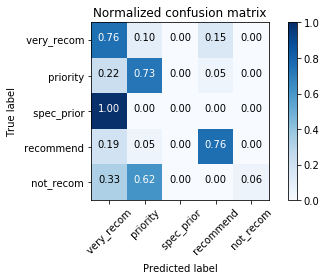

             precision    recall  f1-score   support

 very_recom       0.68      0.78      0.73      2153
   priority       0.77      0.80      0.78      2127
 spec_prior       0.00      0.00      0.00         1
  recommend       0.83      0.72      0.77      2033
  not_recom       1.00      0.02      0.05       166

avg / total       0.76      0.75      0.74      6480

accuracy:  0.7507716049382716


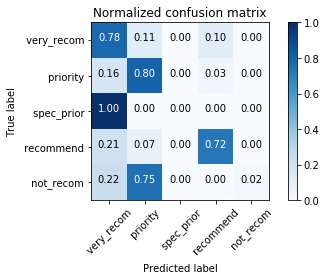

             precision    recall  f1-score   support

 very_recom       0.68      0.75      0.72      2166
   priority       0.79      0.78      0.78      2139
 spec_prior       0.00      0.00      0.00         1
  recommend       0.79      0.78      0.78      2012
  not_recom       0.93      0.08      0.15       162

avg / total       0.76      0.75      0.74      6480

accuracy:  0.750462962962963


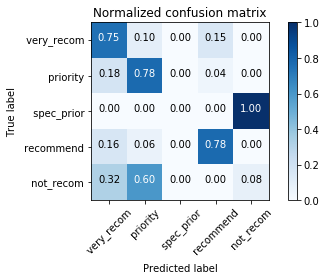

             precision    recall  f1-score   support

 very_recom       0.69      0.74      0.71      2173
   priority       0.78      0.80      0.79      2151
 spec_prior       0.00      0.00      0.00         1
  recommend       0.79      0.77      0.78      1994
  not_recom       1.00      0.04      0.07       161

avg / total       0.76      0.75      0.74      6480

accuracy:  0.7516975308641975


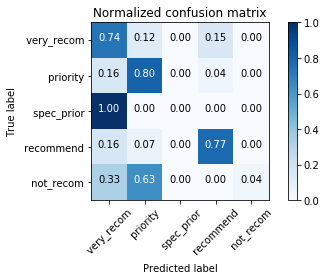

             precision    recall  f1-score   support

 very_recom       0.66      0.77      0.71      2146
   priority       0.78      0.78      0.78      2115
 spec_prior       0.00      0.00      0.00         1
  recommend       0.81      0.74      0.77      2051
  not_recom       0.80      0.02      0.05       167

avg / total       0.75      0.74      0.74      6480

accuracy:  0.7429012345679012


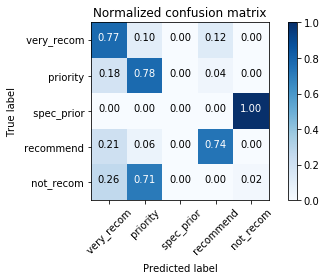

In [17]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

             precision    recall  f1-score   support

 very_recom       0.81      0.87      0.84      2136
   priority       0.78      0.81      0.79      2160
 spec_prior       0.00      0.00      0.00         2
  recommend       0.87      0.73      0.79      2017
  not_recom       0.55      0.72      0.63       165

avg / total       0.81      0.80      0.80      6480

accuracy:  0.8032407407407407


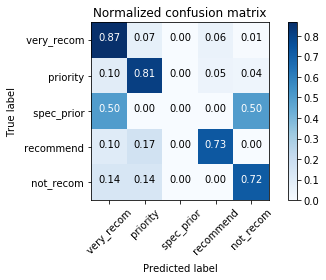

             precision    recall  f1-score   support

 very_recom       0.84      0.87      0.86      2183
   priority       0.78      0.82      0.80      2106
 spec_prior       0.00      0.00      0.00         0
  recommend       0.87      0.76      0.81      2028
  not_recom       0.58      0.73      0.65       163

avg / total       0.82      0.82      0.82      6480

accuracy:  0.8182098765432099


/home/eleni/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


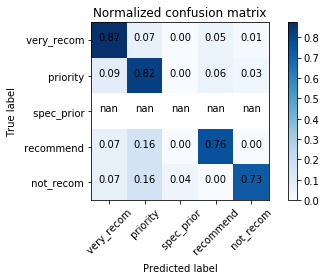

             precision    recall  f1-score   support

 very_recom       0.83      0.87      0.85      2191
   priority       0.78      0.82      0.80      2093
 spec_prior       0.00      0.00      0.00         0
  recommend       0.87      0.75      0.80      2029
  not_recom       0.60      0.80      0.68       167

avg / total       0.82      0.82      0.82      6480

accuracy:  0.8151234567901234


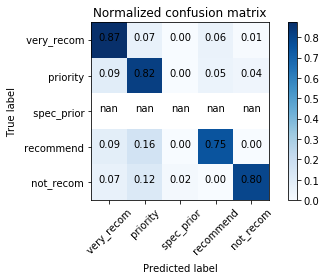

             precision    recall  f1-score   support

 very_recom       0.81      0.85      0.83      2128
   priority       0.76      0.82      0.79      2173
 spec_prior       0.00      0.00      0.00         2
  recommend       0.87      0.73      0.79      2016
  not_recom       0.59      0.82      0.69       161

avg / total       0.80      0.80      0.80      6480

accuracy:  0.7986111111111112


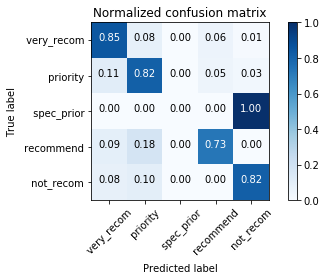

             precision    recall  f1-score   support

 very_recom       0.81      0.86      0.84      2158
   priority       0.76      0.80      0.78      2131
 spec_prior       0.00      0.00      0.00         2
  recommend       0.86      0.75      0.80      2020
  not_recom       0.57      0.67      0.62       169

avg / total       0.80      0.80      0.80      6480

accuracy:  0.8003086419753086


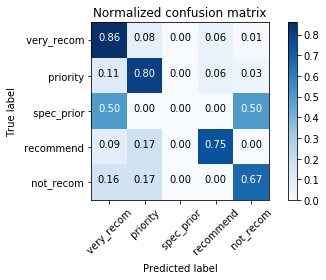

             precision    recall  f1-score   support

 very_recom       0.86      0.87      0.87      2161
   priority       0.77      0.86      0.82      2135
 spec_prior       0.00      0.00      0.00         0
  recommend       0.89      0.74      0.81      2025
  not_recom       0.55      0.77      0.64       159

avg / total       0.83      0.82      0.82      6480

accuracy:  0.8237654320987654


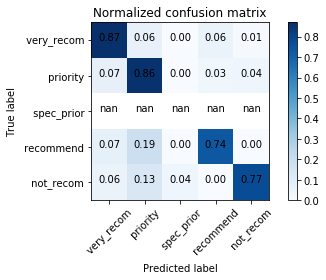

set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.82      0.85      0.83      2156
   priority       0.77      0.83      0.80      2108
 spec_prior       0.25      1.00      0.40         1
  recommend       0.86      0.75      0.80      2053
  not_recom       0.56      0.74      0.64       162

avg / total       0.81      0.81      0.81      6480

accuracy:  0.8064814814814815


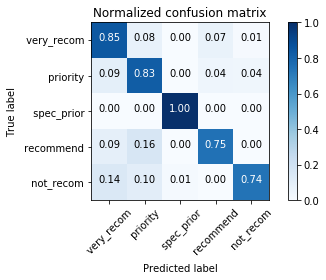

set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.84      0.88      0.86      2163
   priority       0.78      0.83      0.81      2158
 spec_prior       0.00      0.00      0.00         1
  recommend       0.87      0.75      0.80      1992
  not_recom       0.59      0.71      0.64       166

avg / total       0.82      0.82      0.82      6480

accuracy:  0.8175925925925925


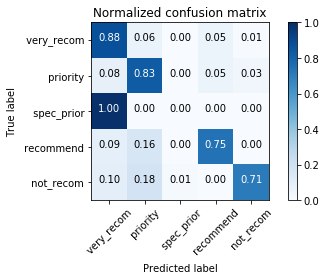

             precision    recall  f1-score   support

 very_recom       0.82      0.85      0.83      2146
   priority       0.77      0.81      0.79      2158
 spec_prior       0.00      0.00      0.00         2
  recommend       0.85      0.75      0.79      2016
  not_recom       0.56      0.75      0.64       158

avg / total       0.80      0.80      0.80      6480

accuracy:  0.8003086419753086


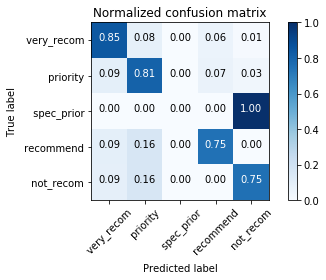

             precision    recall  f1-score   support

 very_recom       0.83      0.88      0.85      2173
   priority       0.76      0.83      0.80      2108
 spec_prior       0.00      0.00      0.00         0
  recommend       0.87      0.73      0.79      2029
  not_recom       0.55      0.67      0.60       170

avg / total       0.82      0.81      0.81      6480

accuracy:  0.8089506172839506


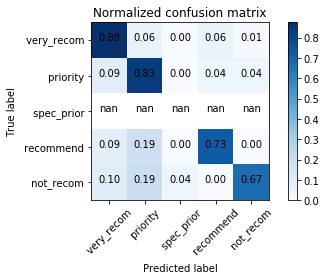

In [18]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2136
   priority       0.87      0.95      0.91      2139
 spec_prior       0.97      0.85      0.90      2040
  not_recom       0.92      0.66      0.77       165

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9228395061728395


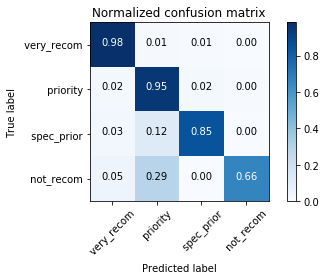

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2183
   priority       0.88      0.95      0.91      2127
 spec_prior       0.00      0.00      0.00         2
  recommend       0.95      0.87      0.91      2005
  not_recom       0.93      0.70      0.80       163

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9246913580246914


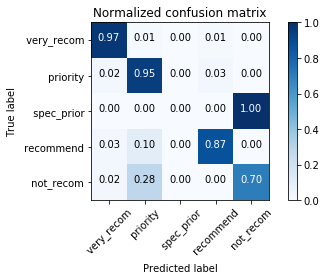

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2140
   priority       0.88      0.95      0.91      2151
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.86      0.91      2022
  not_recom       0.99      0.69      0.82       166

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9243827160493827


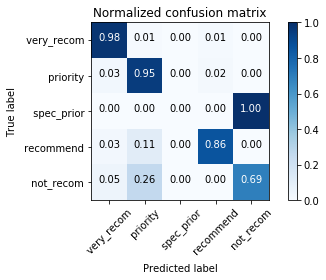

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.96      2179
   priority       0.86      0.95      0.90      2115
 spec_prior       0.00      0.00      0.00         1
  recommend       0.97      0.85      0.90      2023
  not_recom       0.96      0.64      0.77       162

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9195987654320987


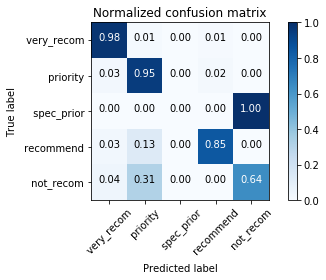

             precision    recall  f1-score   support

 very_recom       0.93      0.97      0.95      2146
   priority       0.86      0.95      0.90      2133
 spec_prior       0.00      0.00      0.00         0
  recommend       0.96      0.84      0.89      2037
  not_recom       0.97      0.68      0.80       164

avg / total       0.92      0.91      0.91      6480

accuracy:  0.9137345679012345


/home/eleni/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


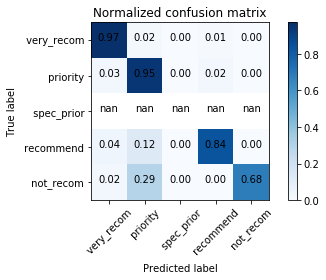

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2173
   priority       0.88      0.95      0.92      2133
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.87      0.91      2008
  not_recom       0.99      0.67      0.80       164

avg / total       0.93      0.93      0.93      6480

accuracy:  0.928395061728395


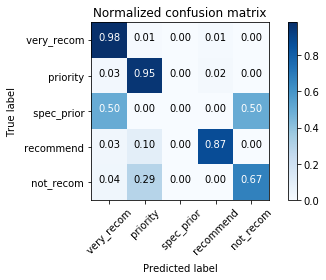

             precision    recall  f1-score   support

 very_recom       0.93      0.98      0.95      2153
   priority       0.85      0.95      0.89      2080
 spec_prior       0.00      0.00      0.00         2
  recommend       0.97      0.85      0.90      2069
  not_recom       0.95      0.55      0.70       176

avg / total       0.92      0.91      0.91      6480

accuracy:  0.913425925925926


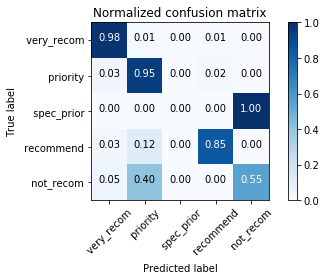

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2166
   priority       0.88      0.96      0.92      2186
 spec_prior       0.97      0.87      0.91      1976
  not_recom       0.93      0.71      0.81       152

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9299382716049382


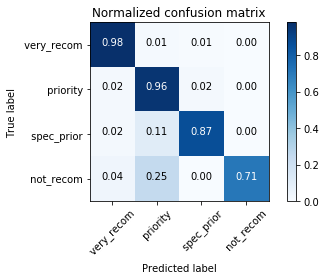

             precision    recall  f1-score   support

 very_recom       0.93      0.97      0.95      2158
   priority       0.88      0.94      0.91      2146
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.87      0.91      2008
  not_recom       0.96      0.66      0.78       167

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9195987654320987


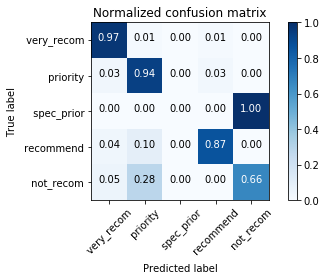

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2161
   priority       0.87      0.95      0.91      2120
 spec_prior       0.00      0.00      0.00         1
  recommend       0.97      0.87      0.91      2037
  not_recom       0.92      0.63      0.75       161

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9259259259259259


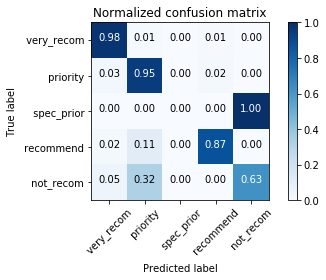

In [19]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2148
   priority       0.88      0.94      0.91      2157
 spec_prior       0.95      0.86      0.90      2008
  not_recom       0.96      0.71      0.81       167

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9236111111111112


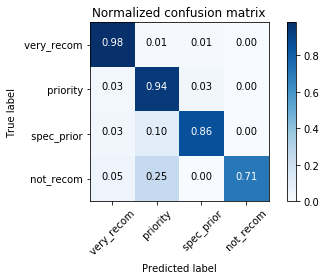

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2171
   priority       0.86      0.96      0.90      2109
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.84      0.90      2037
  not_recom       0.93      0.68      0.79       161

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9191358024691358


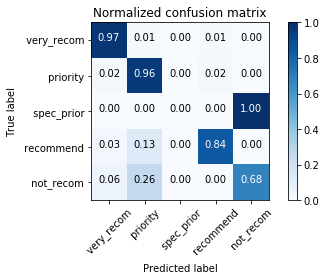

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.96      2187
   priority       0.89      0.94      0.91      2138
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.88      0.91      1987
  not_recom       0.90      0.61      0.73       166

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9219135802469136


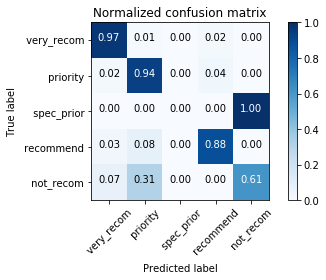

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2132
   priority       0.86      0.96      0.91      2128
 spec_prior       0.97      0.84      0.90      2058
  not_recom       0.95      0.71      0.81       162

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9225308641975308


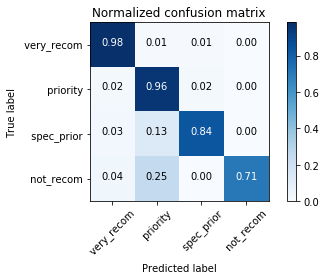

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2163
   priority       0.87      0.93      0.90      2144
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.87      0.90      2010
  not_recom       0.97      0.69      0.80       162

avg / total       0.92      0.92      0.92      6480

accuracy:  0.917746913580247


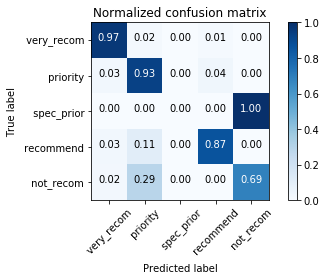

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2156
   priority       0.85      0.95      0.90      2122
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.84      0.90      2035
  not_recom       0.93      0.65      0.77       166

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9185185185185185


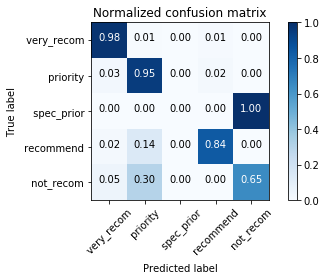

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2173
   priority       0.87      0.95      0.91      2134
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.86      0.90      2005
  not_recom       0.90      0.73      0.81       167

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9233024691358025


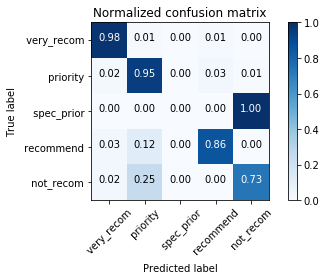

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2146
   priority       0.87      0.94      0.90      2132
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.85      0.90      2040
  not_recom       0.92      0.71      0.80       161

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9205246913580247


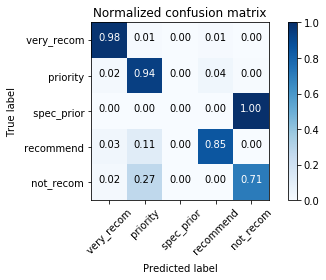

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.96      2140
   priority       0.86      0.94      0.90      2100
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.85      0.90      2081
  not_recom       0.88      0.64      0.74       157

avg / total       0.92      0.92      0.91      6480

accuracy:  0.9155864197530864


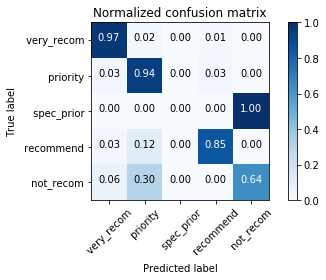

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.96      2179
   priority       0.87      0.95      0.91      2166
 spec_prior       0.95      0.86      0.90      1964
  not_recom       0.92      0.62      0.74       171

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9220679012345679


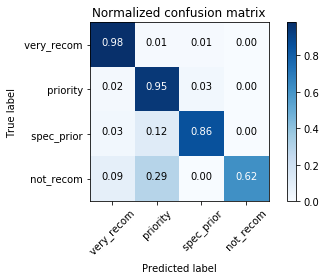

In [20]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2140
   priority       0.88      0.95      0.91      2167
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.88      0.91      1994
  not_recom       0.96      0.50      0.66       178

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9273148148148148


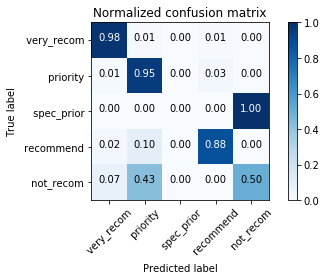

             precision    recall  f1-score   support

 very_recom       0.96      0.97      0.96      2179
   priority       0.86      0.94      0.90      2099
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.87      0.90      2051
  not_recom       0.83      0.63      0.72       150

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9191358024691358


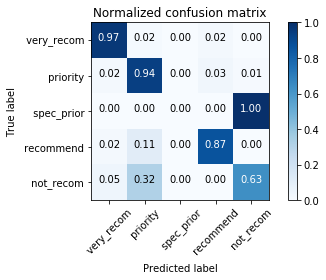

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2162
   priority       0.86      0.95      0.91      2090
 spec_prior       0.95      0.86      0.90      2061
  not_recom       0.96      0.64      0.77       167

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9229938271604938


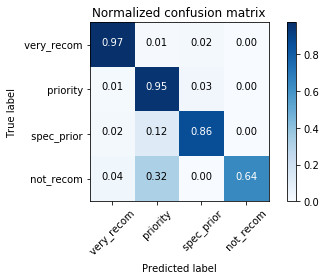

             precision    recall  f1-score   support

 very_recom       0.96      0.97      0.96      2157
   priority       0.89      0.95      0.92      2176
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.89      0.91      1984
  not_recom       0.95      0.63      0.76       161

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9282407407407407


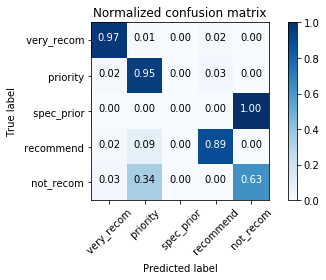

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2129
   priority       0.87      0.95      0.91      2191
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.87      0.91      1998
  not_recom       0.93      0.65      0.77       161

avg / total       0.93      0.93      0.92      6480

accuracy:  0.925


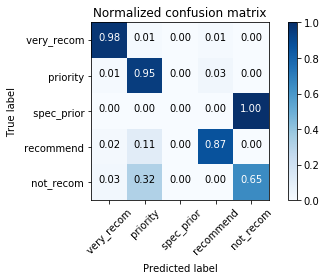

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2190
   priority       0.85      0.94      0.89      2075
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.87      0.91      2047
  not_recom       0.97      0.55      0.70       167

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9174382716049383


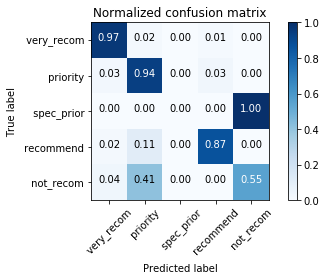

             precision    recall  f1-score   support

 very_recom       0.95      0.97      0.96      2136
   priority       0.88      0.91      0.90      2172
 spec_prior       0.00      0.00      0.00         1
  recommend       0.92      0.88      0.90      2006
  not_recom       0.93      0.61      0.74       165

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9128086419753086


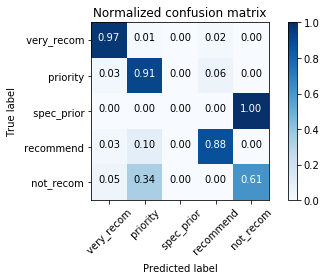

             precision    recall  f1-score   support

 very_recom       0.96      0.97      0.97      2183
   priority       0.86      0.96      0.91      2094
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.85      0.90      2039
  not_recom       0.95      0.64      0.77       163

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9229938271604938


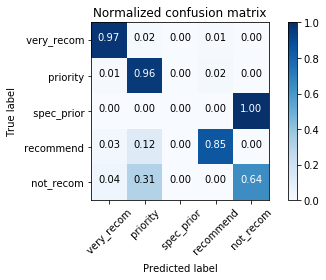

             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2161
   priority       0.87      0.94      0.90      2179
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.87      0.90      1964
  not_recom       0.89      0.56      0.69       174

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9203703703703704


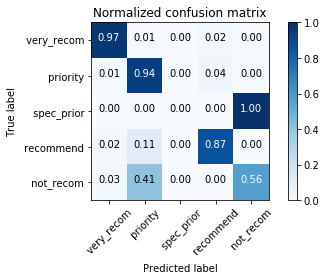

set([' very_recom', ' priority', ' spec_prior', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.97      0.97      0.97      2158
   priority       0.86      0.95      0.91      2087
 spec_prior       0.96      0.87      0.91      2081
  not_recom       0.90      0.65      0.75       154

avg / total       0.93      0.92      0.92      6480

accuracy:  0.9243827160493827


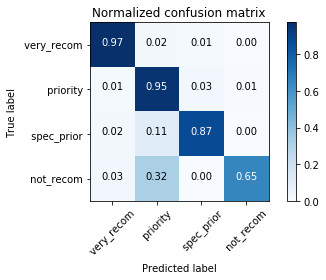

In [21]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.97      0.99      0.98      2217
   priority       0.89      0.96      0.92      2096
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.88      0.91      2019
  not_recom       0.94      0.70      0.80       147

avg / total       0.94      0.94      0.93      6480

accuracy:  0.9353395061728395


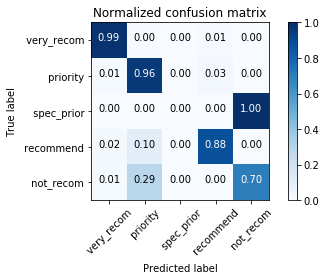

             precision    recall  f1-score   support

 very_recom       0.97      0.98      0.98      2102
   priority       0.88      0.94      0.91      2170
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.89      0.91      2026
  not_recom       0.96      0.55      0.70       181

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9270061728395061


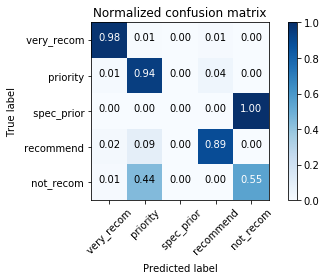

             precision    recall  f1-score   support

 very_recom       0.97      0.98      0.97      2173
   priority       0.89      0.95      0.92      2155
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.89      0.92      1998
  not_recom       0.94      0.67      0.78       153

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9325617283950617


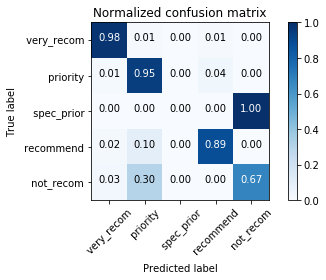

             precision    recall  f1-score   support

 very_recom       0.94      0.98      0.96      2146
   priority       0.87      0.94      0.90      2111
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.87      0.91      2047
  not_recom       0.97      0.53      0.69       175

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9205246913580247


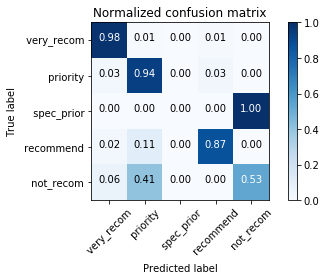

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2149
   priority       0.88      0.94      0.91      2130
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.89      0.92      2041
  not_recom       0.98      0.60      0.74       159

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9294753086419754


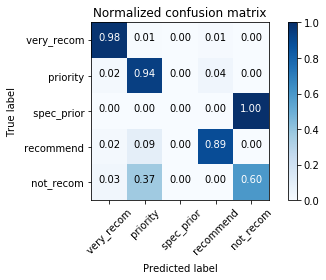

             precision    recall  f1-score   support

 very_recom       0.96      0.99      0.97      2170
   priority       0.88      0.96      0.92      2136
 spec_prior       0.00      0.00      0.00         1
  recommend       0.96      0.87      0.91      2004
  not_recom       0.94      0.56      0.70       169

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9305555555555556


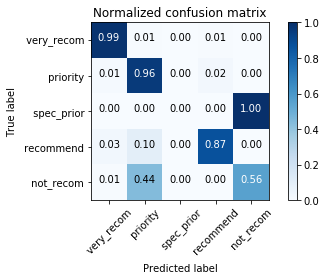

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2147
   priority       0.87      0.94      0.91      2138
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.87      0.91      2042
  not_recom       0.93      0.55      0.69       152

avg / total       0.93      0.92      0.92      6480

accuracy:  0.924074074074074


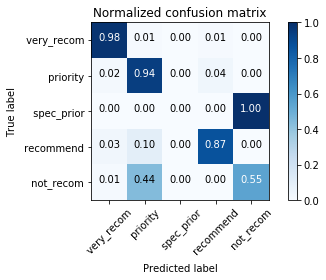

             precision    recall  f1-score   support

 very_recom       0.97      0.98      0.98      2172
   priority       0.87      0.95      0.91      2128
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.88      0.91      2003
  not_recom       0.98      0.59      0.73       176

avg / total       0.93      0.93      0.93      6480

accuracy:  0.9290123456790124


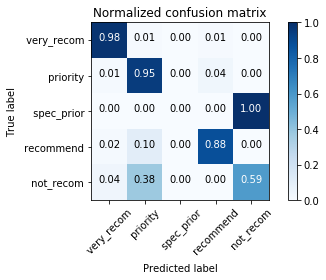

             precision    recall  f1-score   support

 very_recom       0.95      0.98      0.97      2145
   priority       0.88      0.95      0.91      2143
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.88      0.91      2027
  not_recom       0.97      0.61      0.75       164

avg / total       0.93      0.93      0.93      6480

accuracy:  0.928395061728395


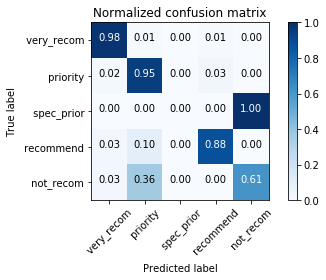

             precision    recall  f1-score   support

 very_recom       0.96      0.98      0.97      2174
   priority       0.88      0.94      0.91      2123
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.88      0.91      2018
  not_recom       0.95      0.56      0.70       164

avg / total       0.93      0.93      0.92      6480

accuracy:  0.925


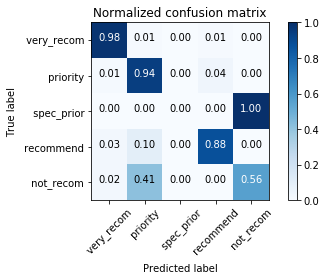

In [22]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.93      0.97      0.95      2133
   priority       0.89      0.92      0.90      2196
 spec_prior       0.92      0.88      0.90      1997
  not_recom       0.99      0.56      0.72       154

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9137345679012345


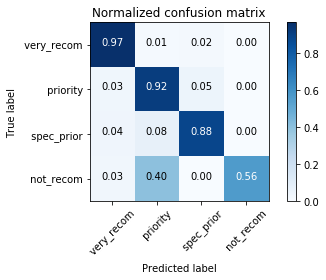

             precision    recall  f1-score   support

 very_recom       0.93      0.97      0.95      2186
   priority       0.87      0.93      0.90      2070
 spec_prior       0.00      0.00      0.00         2
  recommend       0.94      0.86      0.90      2048
  not_recom       0.96      0.47      0.63       174

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9097222222222222


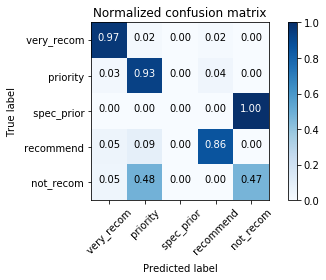

             precision    recall  f1-score   support

 very_recom       0.93      0.97      0.95      2158
   priority       0.90      0.92      0.91      2161
 spec_prior       0.00      0.00      0.00         1
  recommend       0.93      0.90      0.92      2005
  not_recom       0.96      0.45      0.61       155

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9205246913580247


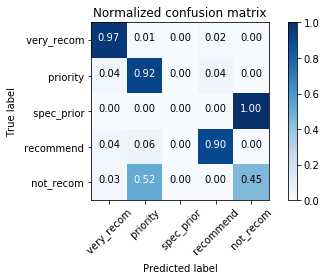

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.96      2161
   priority       0.86      0.94      0.89      2105
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.86      0.90      2040
  not_recom       0.98      0.46      0.62       173

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9115740740740741


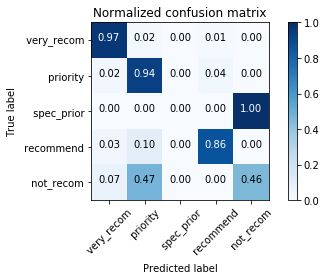

             precision    recall  f1-score   support

 very_recom       0.94      0.96      0.95      2186
   priority       0.88      0.94      0.91      2141
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.88      0.91      1994
  not_recom       0.98      0.55      0.70       158

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9206790123456791


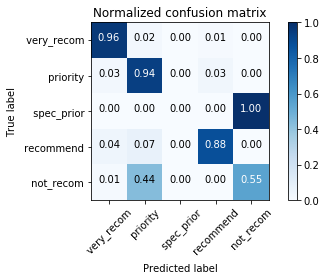

             precision    recall  f1-score   support

 very_recom       0.92      0.96      0.94      2133
   priority       0.87      0.92      0.89      2125
 spec_prior       0.00      0.00      0.00         1
  recommend       0.92      0.86      0.89      2051
  not_recom       0.97      0.45      0.61       170

avg / total       0.90      0.90      0.90      6480

accuracy:  0.9020061728395061


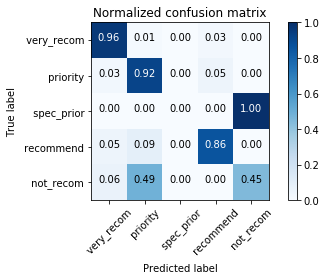

             precision    recall  f1-score   support

 very_recom       0.92      0.97      0.94      2177
   priority       0.88      0.93      0.90      2107
 spec_prior       0.00      0.00      0.00         1
  recommend       0.93      0.87      0.90      2032
  not_recom       0.99      0.45      0.62       163

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9109567901234568


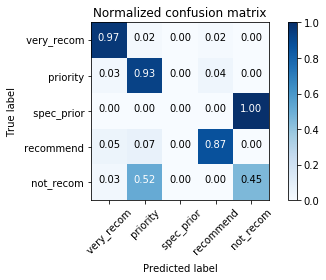

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.95      2142
   priority       0.87      0.93      0.90      2159
 spec_prior       0.00      0.00      0.00         1
  recommend       0.94      0.86      0.90      2013
  not_recom       0.99      0.50      0.67       165

avg / total       0.91      0.91      0.91      6480

accuracy:  0.9120370370370371


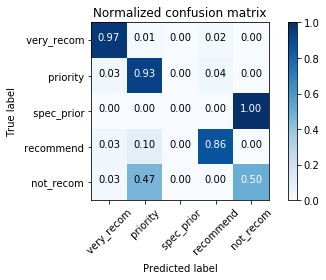

             precision    recall  f1-score   support

 very_recom       0.94      0.97      0.95      2206
   priority       0.89      0.93      0.91      2131
 spec_prior       0.00      0.00      0.00         1
  recommend       0.93      0.88      0.91      1993
  not_recom       0.93      0.53      0.68       149

avg / total       0.92      0.92      0.92      6480

accuracy:  0.9185185185185185


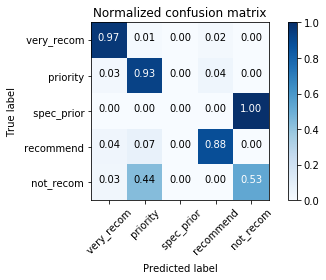

             precision    recall  f1-score   support

 very_recom       0.93      0.98      0.95      2113
   priority       0.87      0.94      0.90      2135
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.87      0.91      2052
  not_recom       0.95      0.41      0.57       179

avg / total       0.92      0.91      0.91      6480

accuracy:  0.9143518518518519


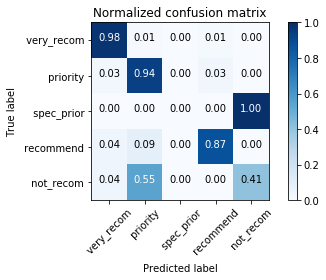

In [23]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.88      0.94      0.91      2157
   priority       0.86      0.89      0.88      2158
 spec_prior       0.00      0.00      0.00         1
  recommend       0.91      0.86      0.88      2001
  not_recom       0.97      0.37      0.53       163

avg / total       0.89      0.88      0.88      6480

accuracy:  0.8834876543209876


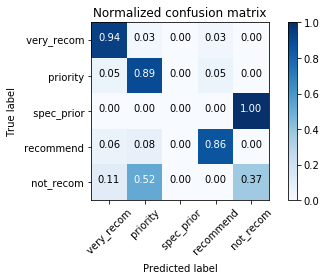

             precision    recall  f1-score   support

 very_recom       0.89      0.93      0.91      2162
   priority       0.82      0.91      0.86      2108
 spec_prior       0.00      0.00      0.00         1
  recommend       0.91      0.82      0.86      2044
  not_recom       0.97      0.35      0.52       165

avg / total       0.88      0.87      0.87      6480

accuracy:  0.8723765432098766


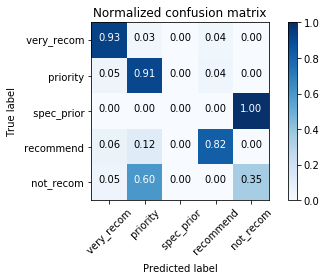

             precision    recall  f1-score   support

 very_recom       0.87      0.93      0.90      2141
   priority       0.86      0.88      0.87      2162
 spec_prior       0.00      0.00      0.00         2
  recommend       0.90      0.84      0.87      2011
  not_recom       0.95      0.38      0.54       164

avg / total       0.87      0.87      0.87      6480

accuracy:  0.8733024691358025


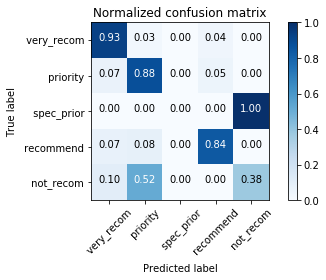

             precision    recall  f1-score   support

 very_recom       0.89      0.92      0.90      2178
   priority       0.85      0.92      0.88      2104
 spec_prior       0.90      0.84      0.87      2034
  not_recom       1.00      0.36      0.53       164

avg / total       0.88      0.88      0.88      6480

accuracy:  0.8782407407407408


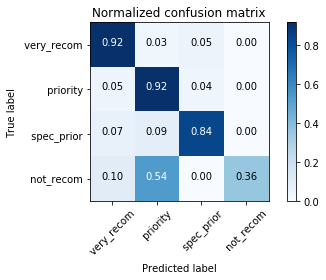

             precision    recall  f1-score   support

 very_recom       0.93      0.91      0.92      2217
   priority       0.85      0.91      0.88      2139
 spec_prior       0.87      0.88      0.88      1954
  not_recom       1.00      0.34      0.50       170

avg / total       0.89      0.89      0.88      6480

accuracy:  0.8861111111111111


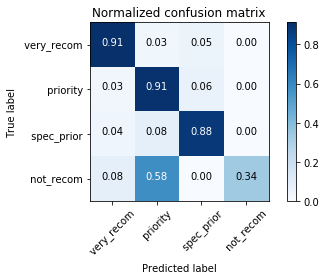

             precision    recall  f1-score   support

 very_recom       0.86      0.94      0.90      2102
   priority       0.85      0.92      0.88      2127
 spec_prior       0.00      0.00      0.00         2
  recommend       0.92      0.80      0.86      2091
  not_recom       0.93      0.36      0.52       158

avg / total       0.88      0.87      0.87      6480

accuracy:  0.8728395061728395


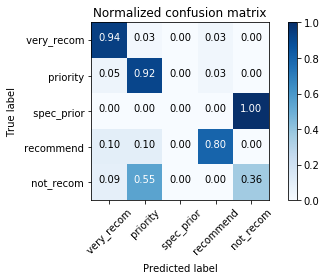

             precision    recall  f1-score   support

 very_recom       0.88      0.93      0.90      2124
   priority       0.86      0.89      0.87      2187
 spec_prior       0.00      0.00      0.00         1
  recommend       0.90      0.86      0.88      2027
  not_recom       0.92      0.43      0.58       141

avg / total       0.88      0.88      0.88      6480

accuracy:  0.8799382716049383


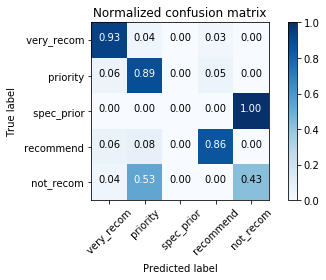

             precision    recall  f1-score   support

 very_recom       0.92      0.93      0.93      2195
   priority       0.83      0.93      0.88      2079
 spec_prior       0.00      0.00      0.00         1
  recommend       0.91      0.83      0.87      2018
  not_recom       0.94      0.26      0.41       187

avg / total       0.89      0.88      0.88      6480

accuracy:  0.8819444444444444


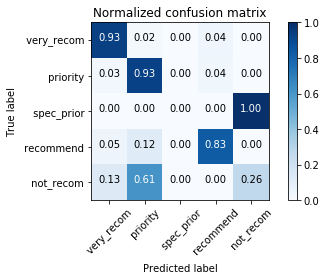

             precision    recall  f1-score   support

 very_recom       0.89      0.92      0.91      2158
   priority       0.85      0.90      0.87      2148
 spec_prior       0.89      0.85      0.87      2015
  not_recom       0.98      0.29      0.45       159

avg / total       0.88      0.88      0.87      6480

accuracy:  0.8774691358024691


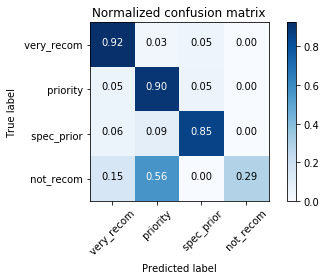

             precision    recall  f1-score   support

 very_recom       0.90      0.93      0.91      2161
   priority       0.84      0.91      0.87      2118
 spec_prior       0.00      0.00      0.00         2
  recommend       0.91      0.84      0.87      2030
  not_recom       0.93      0.39      0.55       169

avg / total       0.88      0.88      0.88      6480

accuracy:  0.879783950617284


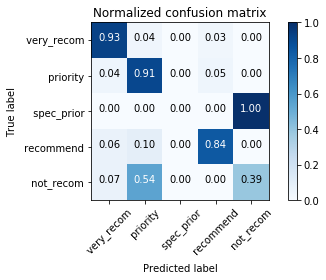

In [24]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.80      0.81      0.81      2198
   priority       0.81      0.86      0.83      2119
 spec_prior       0.00      0.00      0.00         1
  recommend       0.83      0.82      0.83      2001
  not_recom       0.91      0.18      0.30       161

avg / total       0.82      0.81      0.81      6480

accuracy:  0.8148148148148148


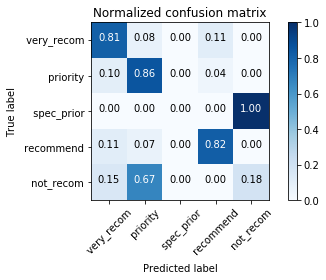

             precision    recall  f1-score   support

 very_recom       0.72      0.85      0.78      2121
   priority       0.82      0.81      0.81      2147
 spec_prior       0.00      0.00      0.00         1
  recommend       0.86      0.76      0.81      2044
  not_recom       0.94      0.10      0.17       167

avg / total       0.80      0.79      0.78      6480

accuracy:  0.7901234567901234


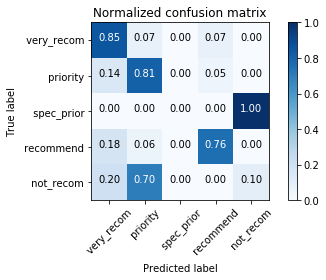

             precision    recall  f1-score   support

 very_recom       0.77      0.84      0.80      2160
   priority       0.81      0.81      0.81      2137
 spec_prior       0.84      0.82      0.83      2025
  not_recom       0.97      0.19      0.32       158

avg / total       0.81      0.81      0.80      6480

accuracy:  0.8050925925925926


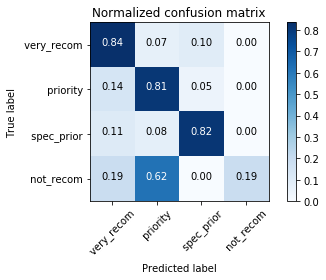

             precision    recall  f1-score   support

 very_recom       0.75      0.83      0.79      2159
   priority       0.79      0.83      0.81      2129
 spec_prior       0.00      0.00      0.00         2
  recommend       0.86      0.77      0.81      2020
  not_recom       0.92      0.13      0.23       170

avg / total       0.80      0.79      0.79      6480

accuracy:  0.7942901234567902


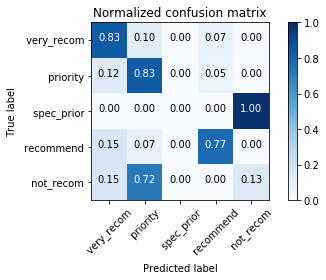

             precision    recall  f1-score   support

 very_recom       0.76      0.82      0.79      2192
   priority       0.82      0.84      0.83      2121
 spec_prior       0.00      0.00      0.00         1
  recommend       0.83      0.81      0.82      2009
  not_recom       1.00      0.11      0.20       157

avg / total       0.81      0.80      0.80      6480

accuracy:  0.8037037037037037


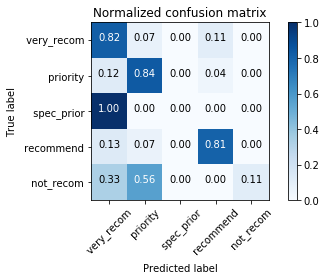

             precision    recall  f1-score   support

 very_recom       0.75      0.85      0.80      2127
   priority       0.80      0.83      0.82      2145
 spec_prior       0.00      0.00      0.00         1
  recommend       0.86      0.78      0.82      2036
  not_recom       0.96      0.15      0.25       171

avg / total       0.81      0.80      0.80      6480

accuracy:  0.803395061728395


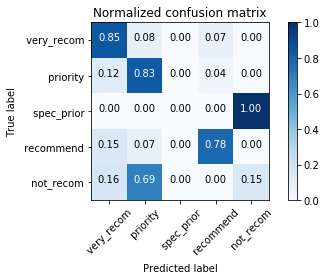

             precision    recall  f1-score   support

 very_recom       0.71      0.84      0.77      2120
   priority       0.83      0.80      0.81      2151
 spec_prior       0.00      0.00      0.00         1
  recommend       0.84      0.77      0.80      2043
  not_recom       0.94      0.10      0.18       165

avg / total       0.80      0.79      0.78      6480

accuracy:  0.7850308641975309


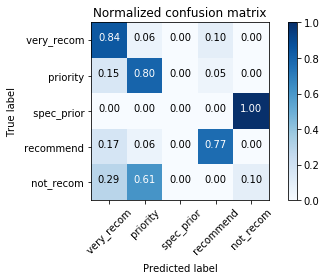

             precision    recall  f1-score   support

 very_recom       0.81      0.82      0.81      2199
   priority       0.78      0.85      0.81      2115
 spec_prior       0.00      0.00      0.00         1
  recommend       0.85      0.81      0.83      2002
  not_recom       0.93      0.17      0.29       163

avg / total       0.81      0.81      0.80      6480

accuracy:  0.8089506172839506


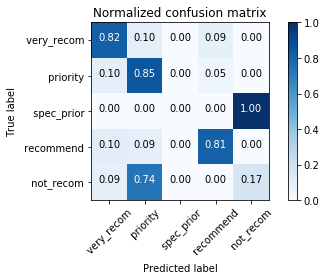

             precision    recall  f1-score   support

 very_recom       0.79      0.83      0.81      2215
   priority       0.79      0.84      0.81      2097
 spec_prior       0.00      0.00      0.00         1
  recommend       0.84      0.80      0.82      2003
  not_recom       0.96      0.13      0.24       164

avg / total       0.81      0.81      0.80      6480

accuracy:  0.8055555555555556


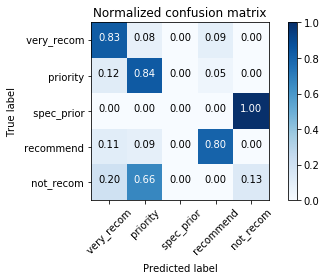

             precision    recall  f1-score   support

 very_recom       0.72      0.84      0.77      2104
   priority       0.83      0.82      0.82      2169
 spec_prior       0.00      0.00      0.00         1
  recommend       0.84      0.76      0.80      2042
  not_recom       0.96      0.16      0.27       164

avg / total       0.80      0.79      0.79      6480

accuracy:  0.7899691358024692


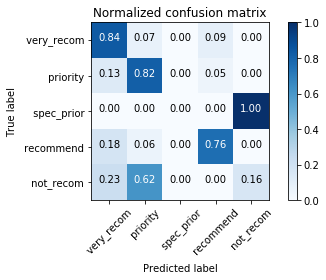

In [25]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

 very_recom       0.66      0.74      0.70      2167
   priority       0.77      0.78      0.78      2122
 spec_prior       0.00      0.00      0.00         1
  recommend       0.79      0.73      0.76      2016
  not_recom       1.00      0.04      0.08       174

avg / total       0.74      0.73      0.73      6480

accuracy:  0.7333333333333333


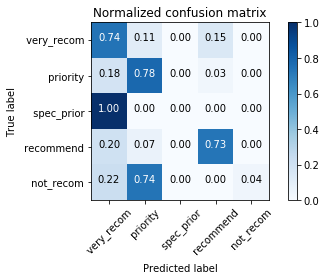

             precision    recall  f1-score   support

 very_recom       0.68      0.77      0.72      2152
   priority       0.78      0.78      0.78      2144
 spec_prior       0.00      0.00      0.00         1
  recommend       0.82      0.77      0.80      2029
  not_recom       1.00      0.03      0.05       154

avg / total       0.76      0.75      0.75      6480

accuracy:  0.754320987654321


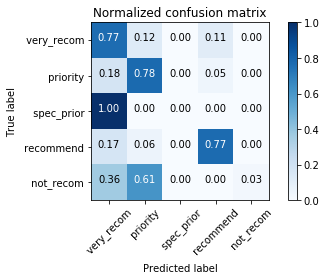

             precision    recall  f1-score   support

 very_recom       0.67      0.77      0.72      2166
   priority       0.77      0.79      0.78      2131
 spec_prior       0.81      0.74      0.77      2020
  not_recom       1.00      0.06      0.10       163

avg / total       0.76      0.75      0.74      6480

accuracy:  0.7470679012345679


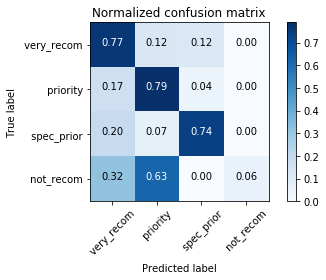

             precision    recall  f1-score   support

 very_recom       0.70      0.75      0.72      2153
   priority       0.78      0.78      0.78      2135
 spec_prior       0.00      0.00      0.00         2
  recommend       0.79      0.79      0.79      2025
  not_recom       0.83      0.03      0.06       165

avg / total       0.76      0.75      0.75      6480

accuracy:  0.7537037037037037


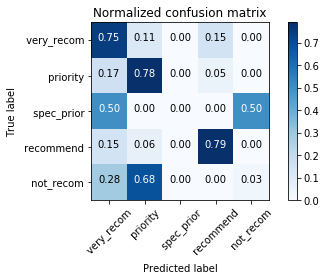

             precision    recall  f1-score   support

 very_recom       0.63      0.80      0.71      2116
   priority       0.79      0.75      0.77      2154
 spec_prior       0.00      0.00      0.00         1
  recommend       0.83      0.72      0.77      2047
  not_recom       1.00      0.06      0.12       162

avg / total       0.76      0.74      0.73      6480

accuracy:  0.7361111111111112


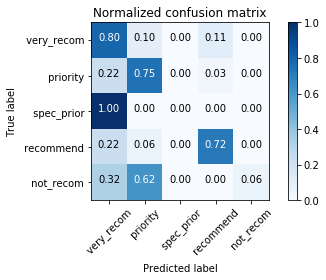

             precision    recall  f1-score   support

 very_recom       0.74      0.72      0.73      2203
   priority       0.76      0.84      0.80      2112
 spec_prior       0.00      0.00      0.00         1
  recommend       0.79      0.79      0.79      1998
  not_recom       0.83      0.03      0.06       166

avg / total       0.76      0.76      0.75      6480

accuracy:  0.7615740740740741


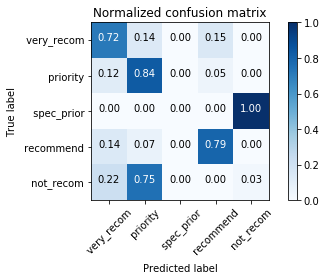

             precision    recall  f1-score   support

 very_recom       0.67      0.79      0.72      2129
   priority       0.80      0.76      0.78      2177
 spec_prior       0.00      0.00      0.00         2
  recommend       0.83      0.78      0.80      2006
  not_recom       1.00      0.02      0.04       166

avg / total       0.77      0.75      0.75      6480

accuracy:  0.7537037037037037


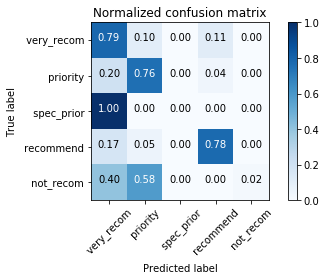

             precision    recall  f1-score   support

 very_recom       0.71      0.74      0.72      2190
   priority       0.77      0.82      0.79      2089
 spec_prior       0.79      0.75      0.77      2039
  not_recom       1.00      0.07      0.14       162

avg / total       0.76      0.75      0.75      6480

accuracy:  0.7533950617283951


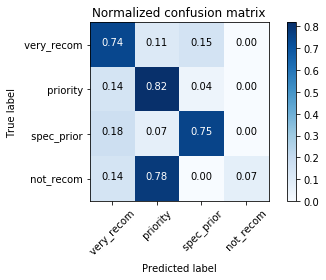

             precision    recall  f1-score   support

 very_recom       0.70      0.75      0.73      2182
   priority       0.76      0.83      0.79      2118
 spec_prior       0.00      0.00      0.00         1
  recommend       0.81      0.75      0.78      2010
  not_recom       0.86      0.04      0.07       169

avg / total       0.76      0.76      0.75      6480

accuracy:  0.7557098765432099


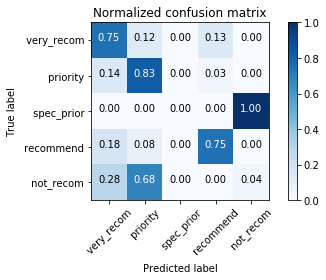

             precision    recall  f1-score   support

 very_recom       0.65      0.76      0.70      2137
   priority       0.79      0.76      0.77      2148
 spec_prior       0.00      0.00      0.00         1
  recommend       0.80      0.74      0.77      2035
  not_recom       1.00      0.06      0.11       159

avg / total       0.75      0.74      0.73      6480

accuracy:  0.7375


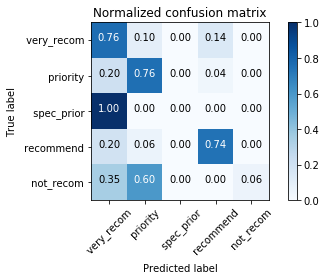

In [26]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()